# 1. Hipótese: a energia renovável favorece o desenvolvimento econômico

A transição para a energia renovável é frequentemente vista sob a lente da sustentabilidade ambiental. No entanto, seu impacto vai além, desempenhando um papel crucial no desenvolvimento econômico, especialmente em países emergentes e em desenvolvimento. Esta hipótese sustenta que o aumento no uso de energias renováveis pode levar a melhorias significativas na balança comercial, aumento da renda, e melhores condições de vida. O coração desta proposição reside no potencial das energias renováveis de alterar positivamente os fundamentos econômicos, estimulando a autossuficiência energética, criando empregos, fomentando tecnologias inovadoras e possibilitando avanço técnico em países com menor desenvolvimento.<br>
<br>

**Metodologia** Os elementos selecionados para avaliar esta hipótese incluem a participação de energia renovável no consumo total de energia, o acesso à eletricidade, o crescimento do PIB, o PIB per capta e o fluxo de investimentos financeiros. Serão feitas análises estatísticas para avaliar a correlação dessas variáveis, comparação entre países, e testes com as ferramentas disponíveis. <br>
<br>

**Detalhamento** Para países emergentes e em desenvolvimento, onde a segurança energética e o acesso a fontes de energia confiáveis são muitas vezes desafios, a energia renovável representa uma oportunidade de ouro. Ao investir em fontes de energia renovável, esses países podem reduzir a dependência de importações de combustíveis fósseis voláteis, promovendo uma maior estabilidade econômica. Além disso, a energia renovável tem o potencial de ser mais democrática e acessível, alcançando comunidades remotas e pobres, facilitando assim o desenvolvimento econômico inclusivo.<br>
Sugerimos que o investimento em energias renováveis pode ser um catalisador para o crescimento econômico. Este crescimento é impulsionado pela criação de empregos no setor de energias renováveis, pela inovação tecnológica, e pelo aumento da competitividade em indústrias energéticas emergentes. Além disso, o acesso ampliado à energia pode ajudar a aliviar a pobreza, possibilitando melhorias na saúde, na educação e em outras áreas vitais para o desenvolvimento humano.<br>

**Fonte:** Global Data on Sustainable Energy <br>
https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy 

# 2. Carga das Ferramentas

In [251]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [252]:
# Carregando o dataset
path_dataset = r'https://raw.githubusercontent.com/Felipefalex/Projeto-Sustainable-Energy/main/global-data-on-sustainable-energy%20(1).csv'
data = pd.read_csv(path_dataset)

# Exibindo as primeiras linhas do dataset para inspeção inicial
data.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

# 3. Análise dos Dados

A primeira fase do projeo é a análise da estrutura dos dados: quais são as informações disponíveis, como estão elencadas e qual seu comportamento.

In [253]:
# Tamanho do dataset e tipos de dados de cada coluna
dataset_info = data.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [254]:
# Quantidade e nome dos países
nomes_paises = data['Entity'].unique()
quantidade_paises = len(data['Entity'].unique())

print(quantidade_paises)
print('\n')
print(nomes_paises)

176


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 

In [255]:
# Valores vazios
vazios = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
vazios = vazios.rename(columns = {0 : 'Null Values'})
vazios

Null Values
Renewables (% equivalent primary energy)                   2137
Financial flows to developing countries (US $)             2089
Renewable-electricity-generating-capacity-per-c...          931
Value_co2_emissions_kt_by_country                           428
gdp_growth                                                  317
gdp_per_capita                                              282
Energy intensity level of primary energy (MJ/$2...          207
Renewable energy share in the total final energ...          194
Access to clean fuels for cooking                           169
Electricity from nuclear (TWh)                              126
Low-carbon electricity (% electricity)                       42
Electricity from renewables (TWh)                            21
Electricity from fossil fuels (TWh)                          21
Access to electricity (% of population)                      10
Latitude                                                      1
Land Area(Km2)                                                1
Density\n(P/Km2)                                              1
Longitude                                                     1
Primary energy consumption per capita (kWh/person)            0
Year                                                          0
Entity                                                        0

In [256]:
# Colunas de interesse
variáveis_chave = [
    'Renewable energy share in the total final energy consumption (%)',
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Primary energy consumption per capita (kWh/person)',
    'gdp_per_capita',
    'gdp_growth',
    'Financial flows to developing countries (US $)'	
]

# Calculando o número de informações faltantes por país para cada coluna de interesse
valores_faltantes_pais = data[variáveis_chave].isnull().sum(axis=1).groupby(data['Entity']).sum()
valores_faltantes_pais = valores_faltantes_pais.sort_values(ascending=False)

# Exibindo o total de dados faltantes por coluna
print(valores_faltantes_pais.head(25))

Entity
Czechia                             64
Slovakia                            64
New Caledonia                       63
Saint Kitts and Nevis               62
Bahamas                             61
Saint Lucia                         61
Saint Vincent and the Grenadines    59
Gambia                              59
Cayman Islands                      56
Congo                               56
Kyrgyzstan                          51
Aruba                               48
Yemen                               48
Egypt                               44
Bermuda                             43
Puerto Rico                         43
Bulgaria                            43
Libya                               43
Somalia                             43
Albania                             42
Eritrea                             33
Lebanon                             31
Nauru                               31
Djibouti                            24
Qatar                               23
dtype: int64


In [257]:
# Remoção das informações faltantes
# Lista de países a serem removidos
paises_para_remover = [
    "Egypt", "Saint Vincent and the Grenadines", "Saint Lucia", 
    "Saint Kitts and Nevis", "Gambia", "Bahamas", "New Caledonia", 
    "Czechia", "Kyrgyzstan", "Slovakia", "Congo", "Yemen", 
    "Cayman Islands", "Somalia", "Aruba", "Bulgaria", "Bermuda", 
    "Puerto Rico", "Lebanon", "Libya", "Albania", "Eritrea", 
    "Nauru", "Djibouti"
]

# Removendo os países especificados do dataframe
data = data[~data['Entity'].isin(paises_para_remover)]

In [258]:
# Analisando após a remoção
vazios = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
vazios = vazios.rename(columns = {0 : 'Null Values'})
vazios

Null Values
Renewables (% equivalent primary energy)                   1717
Financial flows to developing countries (US $)             1704
Renewable-electricity-generating-capacity-per-c...          826
Value_co2_emissions_kt_by_country                           172
Energy intensity level of primary energy (MJ/$2...          155
Renewable energy share in the total final energ...          150
Electricity from nuclear (TWh)                              126
Low-carbon electricity (% electricity)                       21
Electricity from fossil fuels (TWh)                          21
Electricity from renewables (TWh)                            21
gdp_growth                                                   14
gdp_per_capita                                               10
Access to electricity (% of population)                      10
Latitude                                                      1
Land Area(Km2)                                                1
Density\n(P/Km2)                                              1
Longitude                                                     1
Access to clean fuels for cooking                             1
Primary energy consumption per capita (kWh/person)            0
Year                                                          0
Entity                                                        0

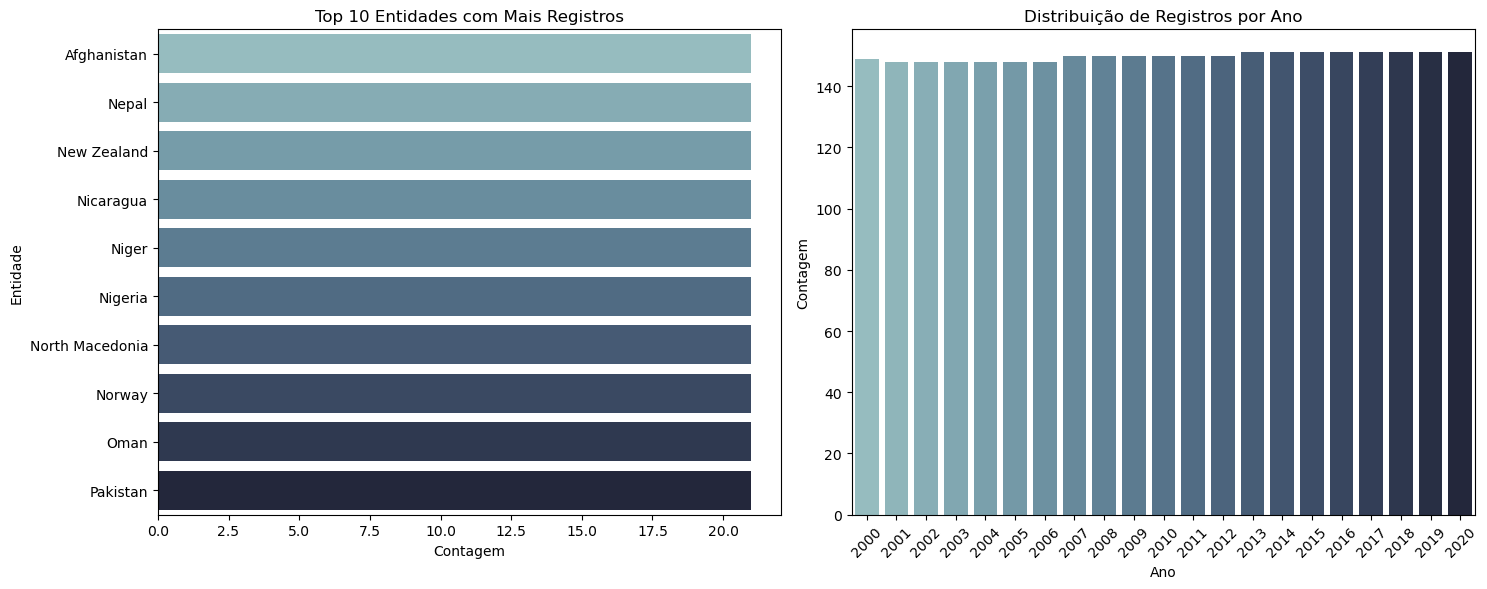

count         mean  \
Year                                                3145.0      2010.04   
Access to electricity (% of population)             3135.0        77.96   
Access to clean fuels for cooking                   3144.0        63.24   
Renewable-electricity-generating-capacity-per-c...  2319.0       118.12   
Financial flows to developing countries (US $)      1441.0  97336079.11   
Renewable energy share in the total final energ...  2995.0        34.72   
Electricity from fossil fuels (TWh)                 3124.0        79.81   
Electricity from nuclear (TWh)                      3019.0        15.29   
Electricity from renewables (TWh)                   3124.0        27.49   
Low-carbon electricity (% electricity)              3124.0        39.21   
Primary energy consumption per capita (kWh/person)  3145.0     26190.02   
Energy intensity level of primary energy (MJ/$2...  2990.0         5.40   
Value_co2_emissions_kt_by_country                   2973.0    171575.90   
Renewables (% equivalent primary energy)            1428.0        12.35   
gdp_growth                                          3131.0         3.50   
gdp_per_capita                                      3135.0     12532.91   
Land Area(Km2)                                      3144.0    688327.07   
Latitude                                            3144.0        17.85   
Longitude                                           3144.0        14.77   

                                                             std      min  \
Year                                                6.050000e+00  2000.00   
Access to electricity (% of population)             3.105000e+01     1.25   
Access to clean fuels for cooking                   3.891000e+01     0.00   
Renewable-electricity-generating-capacity-per-c...  2.549900e+02     0.00   
Financial flows to developing countries (US $)      3.035213e+08     0.00   
Renewable energy share in the total final energ...  2.982000e+01     0.00   
Electricity from fossil fuels (TWh)                 3.740600e+02     0.00   
Electricity from nuclear (TWh)                      7.867000e+01     0.00   
Electricity from renewables (TWh)                   1.121300e+02     0.00   
Low-carbon electricity (% electricity)              3.407000e+01     0.00   
Primary energy consumption per capita (kWh/person)  3.667673e+04     0.00   
Energy intensity level of primary energy (MJ/$2...  3.540000e+00     1.03   
Value_co2_emissions_kt_by_country                   8.041319e+05    10.00   
Renewables (% equivalent primary energy)            1.534000e+01     0.00   
gdp_growth                                          5.030000e+00   -36.66   
gdp_per_capita                                      1.850092e+04   111.93   
Land Area(Km2)                                      1.684990e+06    26.00   
Latitude                                            2.512000e+01   -40.90   
Longitude                                           6.635000e+01  -175.20   

                                                          25%         50%  \
Year                                                  2005.00     2010.00   
Access to electricity (% of population)                 57.57       97.77   
Access to clean fuels for cooking                       24.00       83.15   
Renewable-electricity-generating-capacity-per-c...       5.65       36.08   
Financial flows to developing countries (US $)      280000.00  6200000.00   
Renewable energy share in the total final energ...       8.62       27.55   
Electricity from fossil fuels (TWh)                      0.35        3.50   
Electricity from nuclear (TWh)                           0.00        0.00   
Electricity from renewables (TWh)                        0.12        1.97   
Low-carbon electricity (% electricity)                   6.95       33.64   
Primary energy consumption per capita (kWh/person)    2854.35    12645.60   
Energy intensity level of primary energy (MJ/$2...       3.28        4.39   
Value_co2_

In [259]:
# Estatísticas descritivas das variáveis numéricas
estatisticas_numericas = data.describe().round(2).T

# Visualização da distribuição das principais variáveis categóricas
# Países com maiores números de registros
cores_paises = sns.cubehelix_palette(10, rot=-.25, light=.7)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(y=data['Entity'], order=data['Entity'].value_counts().index[:10], palette=cores_paises)
plt.title('Top 10 Entidades com Mais Registros')
plt.ylabel('Entidade')
plt.xlabel('Contagem')

# Distribuição de registros por ano
cores_anos = sns.cubehelix_palette(21, rot=-.25, light=.7)
plt.subplot(1, 2, 2)
sns.countplot(x=data['Year'], palette=cores_anos)
plt.title('Distribuição de Registros por Ano')
plt.ylabel('Contagem')
plt.xlabel('Ano')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

estatisticas_numericas

`Ano`: Os dados abrangem de 2000 a 2020. A distribuição de registros por ano é bastante uniforme, indicando que a maioria dos anos tem uma quantidade similar de dados.<br>
`Acesso à Eletricidade`: Em média, 77.96% da população tinha acesso à eletricidade, com uma variação considerável (desvio padrão de 31%).<br>
`Acesso a Combustíveis Limpos para Cozinhar`: Média de 63.24% com alta variação (desvio padrão de 39%).<br>
`Capacidade de Geração de Eletricidade Renovável Per Capita`: Média de 118.12, mas com grande variação (desvio padrão de 254), indicando diferenças significativas entre países.<br>
`Fluxos Financeiros para Países em Desenvolvimento`: Média alta com um desvio padrão muito grande, sugerindo uma distribuição bastante desigual desses fluxos.<br>
`Consumo de Energia Primária Per Capita`: Os dados variam significativamente entre os países.<br>
`Emissões de CO2`: Variação substancial nas emissões de CO2 entre os países.<br>
`Países`: O gráfico mostra as 10 entidades (países) com mais registros no dataset. Isso pode ser útil para entender quais países têm dados mais completos ou estão mais frequentemente representados.

In [260]:
# Tratamento de valores faltantes
# Substituindo valores faltantes por zeros em colunas financeiras e de energia
colunas_a_preencher = [
    'Financial flows to developing countries (US $)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)'
]

data[colunas_a_preencher] = data[colunas_a_preencher].fillna(0)

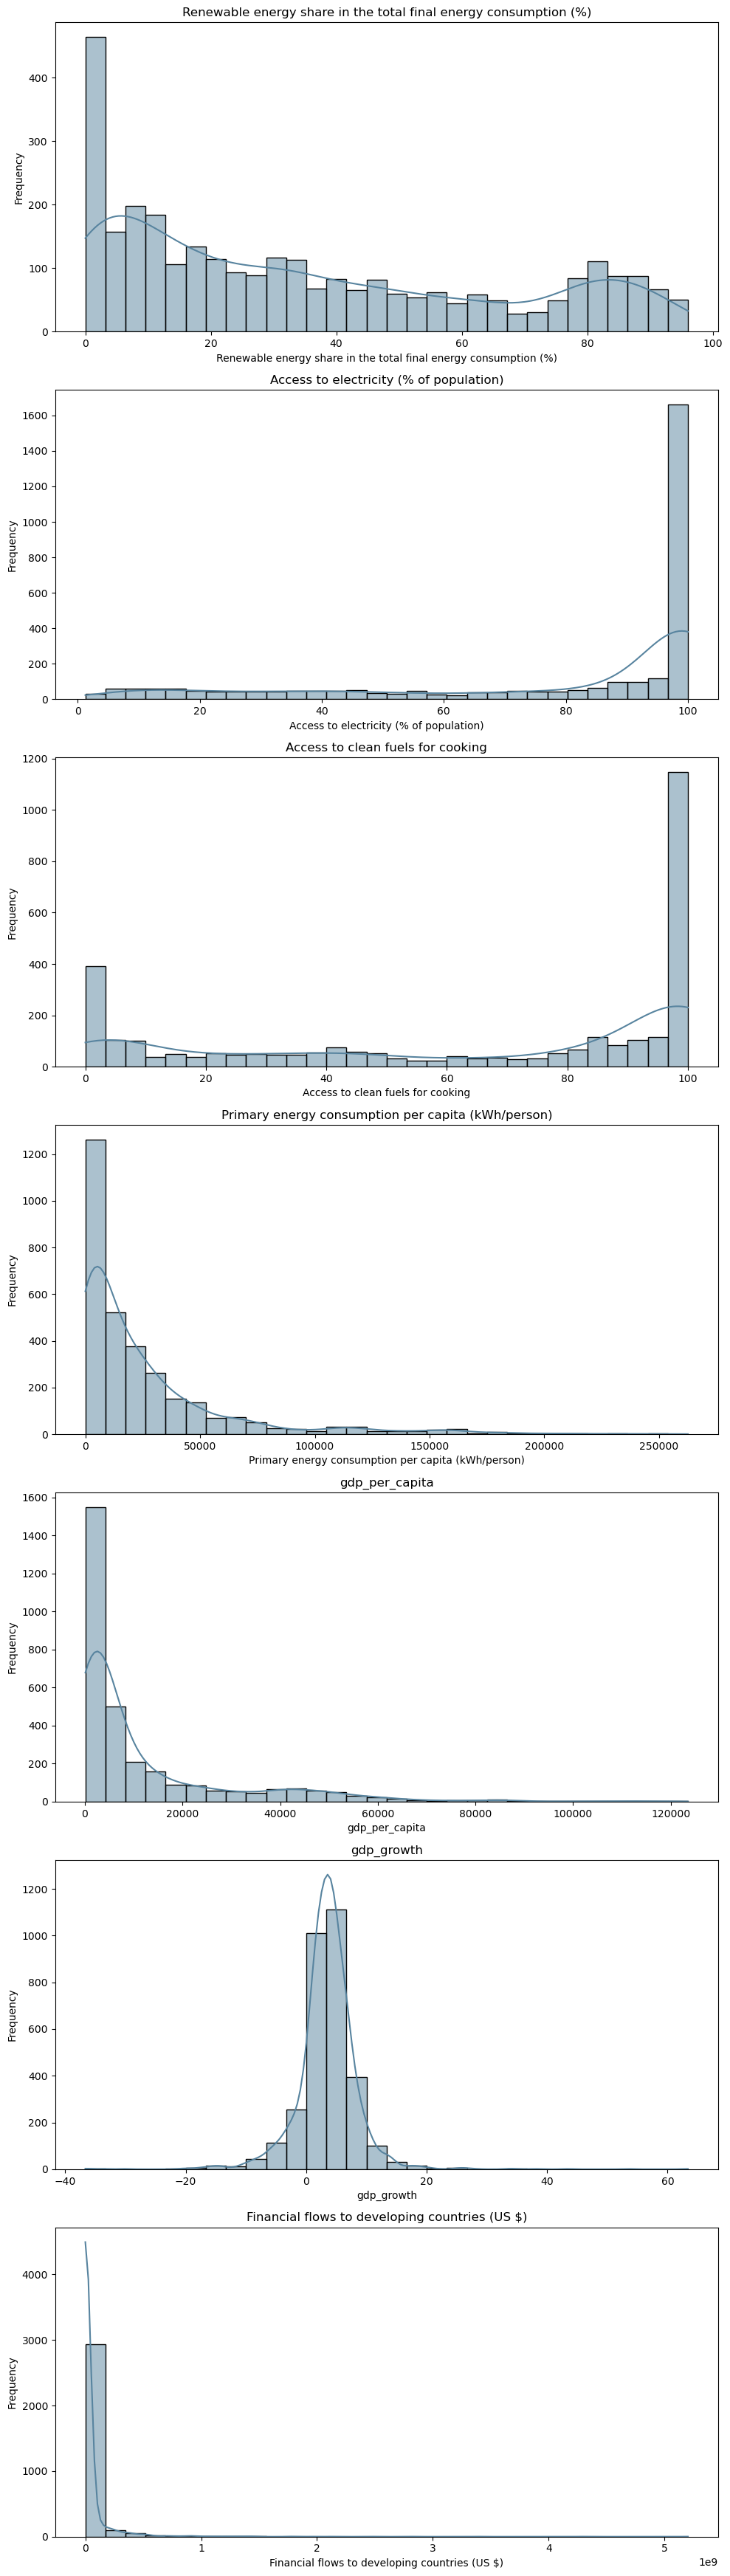

In [261]:
# Visualização Gráfica das Principais Variáveis
# Criando histogramas para cada variável selecionada
cores_hist = sns.cubehelix_palette(rot=-.25, light=.7)
fig, axes = plt.subplots(len(variáveis_chave), 1, figsize=(10, 5 * len(variáveis_chave)))

for i, col in enumerate(variáveis_chave):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True, color=cores_hist[2])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

A maioria das variáveis exibe uma distribuição assimétrica, indicando uma concentração de valores.<br>

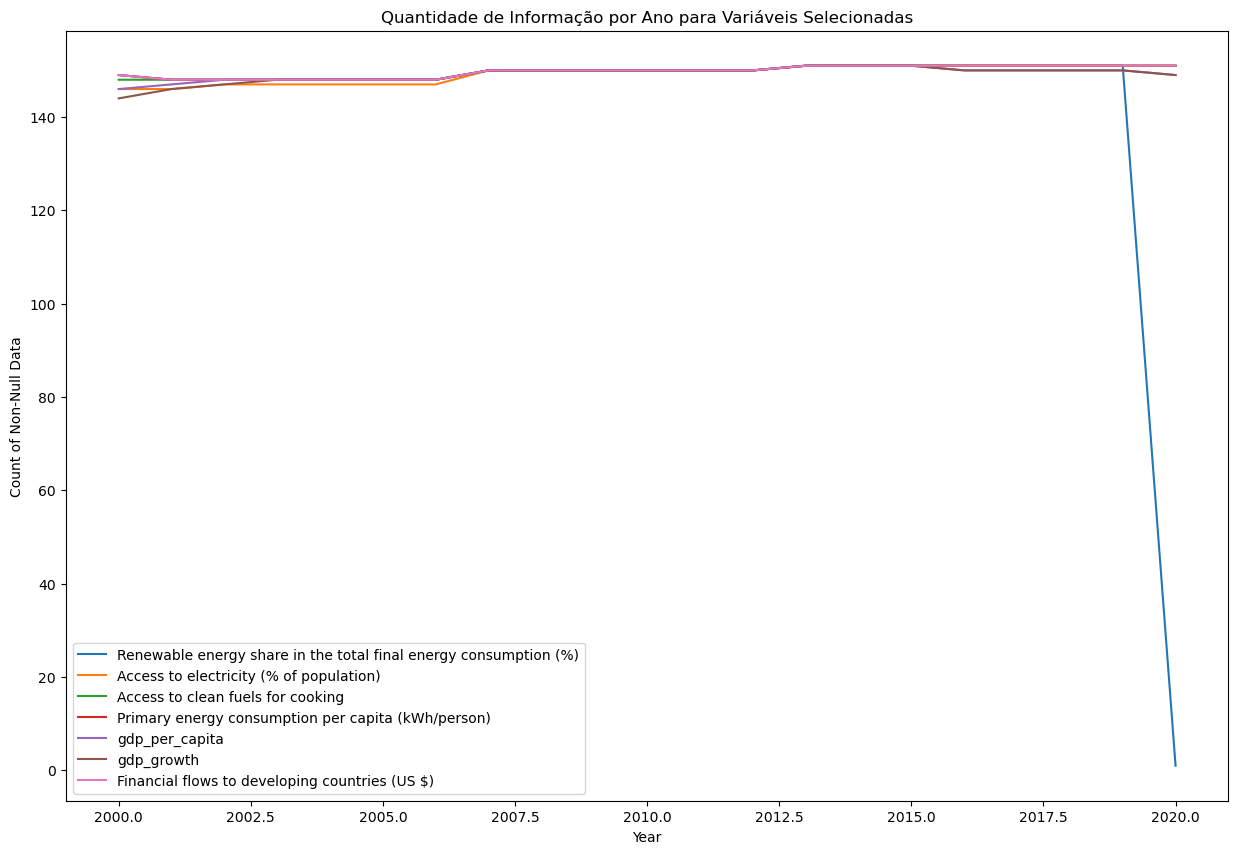

In [262]:
# Contagem de informações não nulas por ano para cada variável
contagem_info = data.groupby('Year')[variáveis_chave].count()

# Plotando o gráfico
plt.figure(figsize=(15, 10))
for var in variáveis_chave:
    plt.plot(contagem_info.index, contagem_info[var], label=var)

plt.xlabel('Year')
plt.ylabel('Count of Non-Null Data')
plt.title('Quantidade de Informação por Ano para Variáveis Selecionadas')
plt.legend()
plt.grid(False)
plt.show()

Sabemos, portanto, que não há dados do percentual de energia renovável para 2020, então precisaremos remover esse ano de nossa análise

In [263]:
# Remoção de 2020
data = data[data['Year'] != 2020]

# Analisando após a remoção
vazios = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
vazios = vazios.rename(columns = {0 : 'Null Values'})
vazios

Null Values
Renewables (% equivalent primary energy)                   1634
Renewable-electricity-generating-capacity-per-c...          786
Value_co2_emissions_kt_by_country                            21
Low-carbon electricity (% electricity)                       20
gdp_growth                                                   12
Access to electricity (% of population)                      10
gdp_per_capita                                                8
Energy intensity level of primary energy (MJ/$2...            5
Latitude                                                      1
Land Area(Km2)                                                1
Density\n(P/Km2)                                              1
Longitude                                                     1
Access to clean fuels for cooking                             1
Primary energy consumption per capita (kWh/person)            0
Year                                                          0
Electricity from renewables (TWh)                             0
Electricity from nuclear (TWh)                                0
Electricity from fossil fuels (TWh)                           0
Renewable energy share in the total final energ...            0
Financial flows to developing countries (US $)                0
Entity                                                        0

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14876\3009424512.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


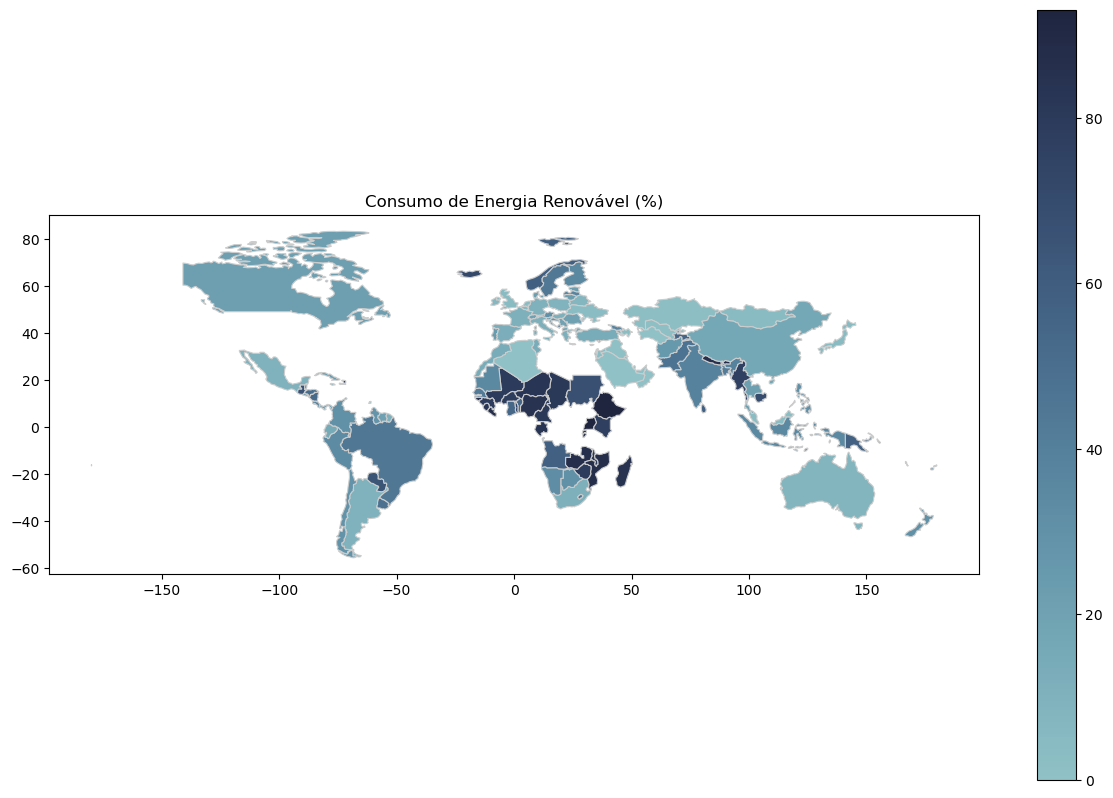

In [264]:
# Carregando um mapa mundial
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculando a média da capacidade de geração de energia renovável per capita por país
media_capacidade_energia_per_capta = data.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean()
energia_renovavel_mundial = mundo.set_index('name').join(media_capacidade_energia_per_capta)

cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
energia_renovavel_mundial.plot(column='Renewable energy share in the total final energy consumption (%)',
                            cmap=cores_mapa,
                            linewidth=0.8,
                            ax=ax,
                            edgecolor='0.8',
                            legend=True)
ax.set_title('Consumo de Energia Renovável (%)')
plt.show()

In [265]:
# Calculando a quantidade de informações não nulas por país para as variáveis-chave
quantidade_info_por_pais = data.groupby('Entity')[variáveis_chave].count().sum(axis=1)

# Ordenando os países pela quantidade de informações não nulas, do maior para o menor
paises_por_quantidade_info = quantidade_info_por_pais.sort_values(ascending=False)

# Exibindo os resultados
print(paises_por_quantidade_info)

Entity
Lesotho          140
Portugal         140
Nepal            140
Netherlands      140
New Zealand      140
                ... 
Liberia          132
Montenegro        91
Serbia            91
South Sudan       41
French Guiana      3
Length: 152, dtype: int64


In [273]:
# Conversao para float
data[variáveis_chave] = data[variáveis_chave].astype(float)

# 4. Verificação da Hipótese - Premissas
Vamos definir os países de análise para relacionarmos modelos especificos como teste de hipótese, regressão, análise temporal e coeficiente de correlação. Selecionaremos os 3 países com maior percentual de energia renovável e os 3 menores. Usaremos também 3 países com maior PIB per capta e os 3 menores. Por fim, usaremos uma amostragem de 6 países.

In [267]:
# Calculando a média do PIB per capita e do percentual de energia renovável para cada país
media_pib_energia = data.groupby('Entity')[['gdp_per_capita', 'Renewable energy share in the total final energy consumption (%)']].mean()

# Encontrando os top 3 e bottom 3 países por PIB per capita
top_3_pib = media_pib_energia['gdp_per_capita'].nlargest(3).index.tolist()
bottom_3_pib = media_pib_energia['gdp_per_capita'].nsmallest(3).index.tolist()

# Encontrando os top 3 e bottom 3 países por percentual de energia renovável
top_3_energia = media_pib_energia['Renewable energy share in the total final energy consumption (%)'].nlargest(3).index.tolist()
bottom_3_energia = media_pib_energia['Renewable energy share in the total final energy consumption (%)'].nsmallest(3).index.tolist()

# Selecionando 6 países aleatoriamente
np.random.seed(100)
paises_aleatorios = np.random.choice(data['Entity'].unique(), 6, replace=False).tolist()

# Combinando todas as listas em uma única array
paises_interesse = np.array(top_3_pib + bottom_3_pib + top_3_energia + bottom_3_energia + paises_aleatorios)

print(paises_interesse)

['Luxembourg' 'Norway' 'Switzerland' 'Burundi' 'Malawi' 'Ethiopia'
 'Uganda' 'Ethiopia' 'Burundi' 'Bahrain' 'Oman' 'Kuwait' 'North Macedonia'
 'Barbados' 'Serbia' 'Benin' 'Solomon Islands' 'Sweden']


# 4. Verificação da Hipótese - Correlação

Vamos começar a investigação dos dados fazendo uma análise de correlação entre o `Percentual de Energia Renovável` e o  `PIB per capta`, o `Crescimento do PIB` e o `Acesso à Eletricidade` 

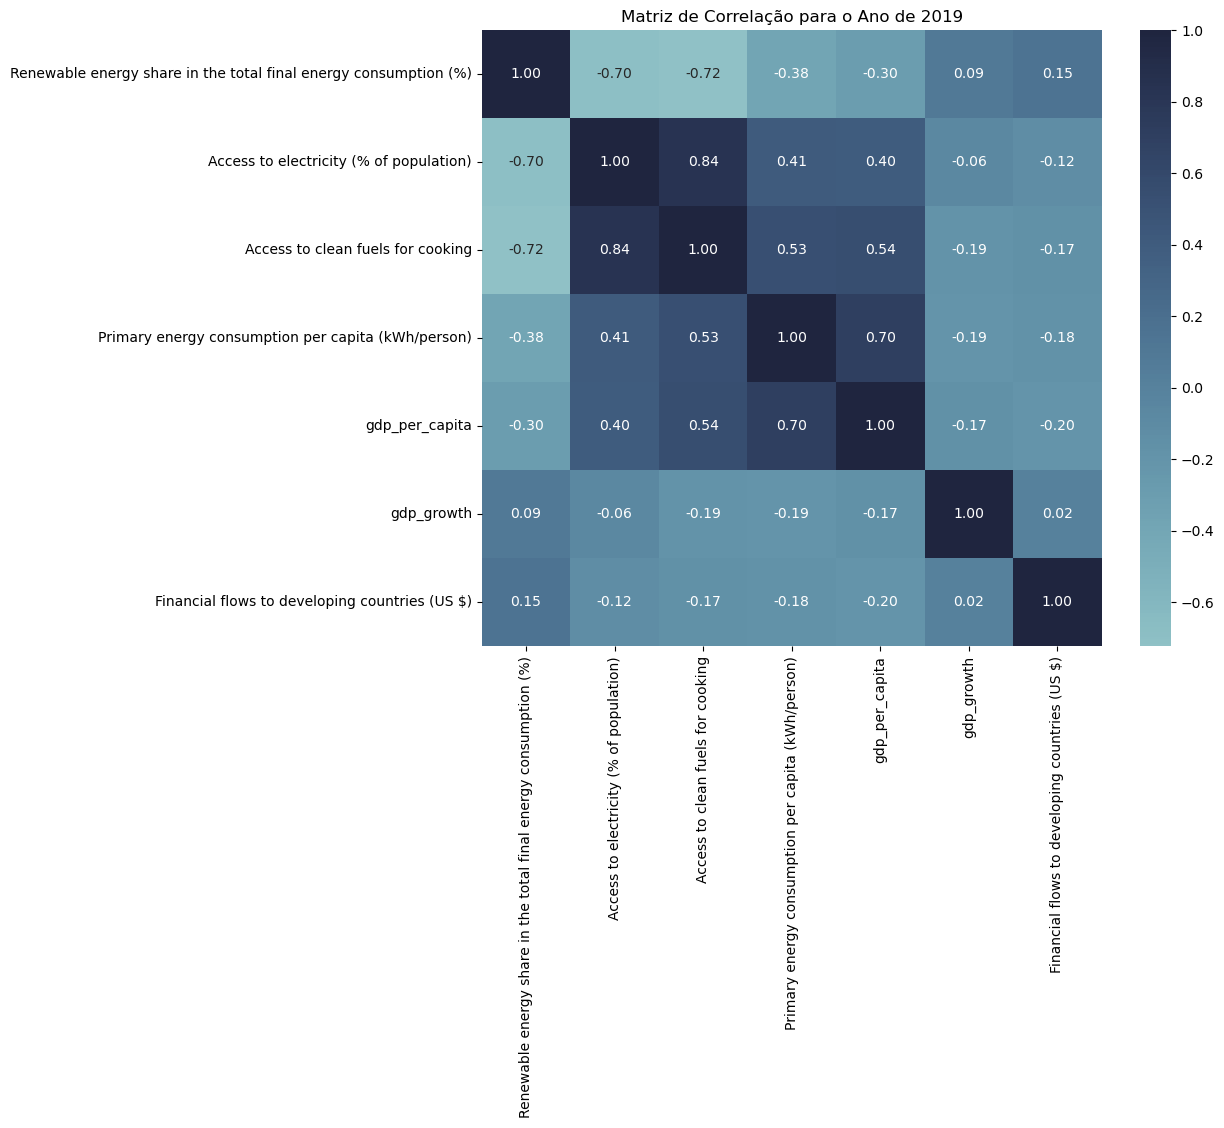

In [268]:
# Filtrando os dados para o ano mais recente com informações (2019)
data_2019 = data[data['Year'] == 2019]

# Matriz de correlação
matriz_correlacao = data_2019[variáveis_chave].corr()

# Criando matrizes de correlação
cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap=cores_mapa, fmt=".2f")
plt.title('Matriz de Correlação para o Ano de 2019')
plt.show()

Devemos nos ater, prioritariamente, à primeira coluna. No qual as variáveis estão em função do percentual de energia.<br>
A matriz sugere que existe uma correlação negativa entre o uso de energia renovável e o PIB per Capta, o Acesso à Eletricidade e o Acesso à Combustíveis Limpos para Cozinhar.<br>

Analisemos agora os países de interesse

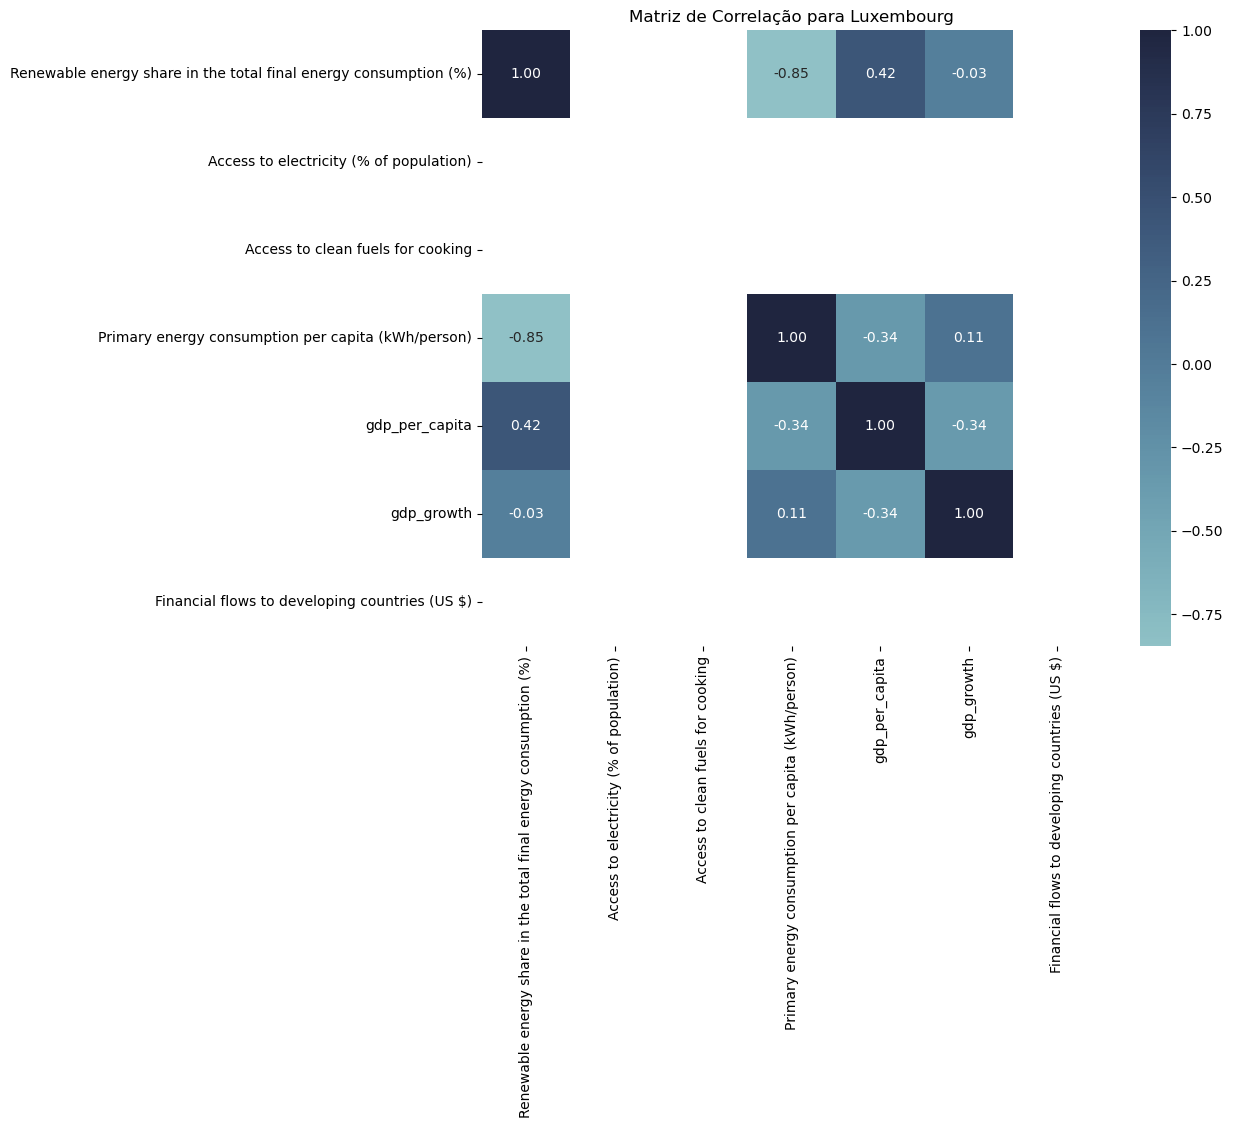

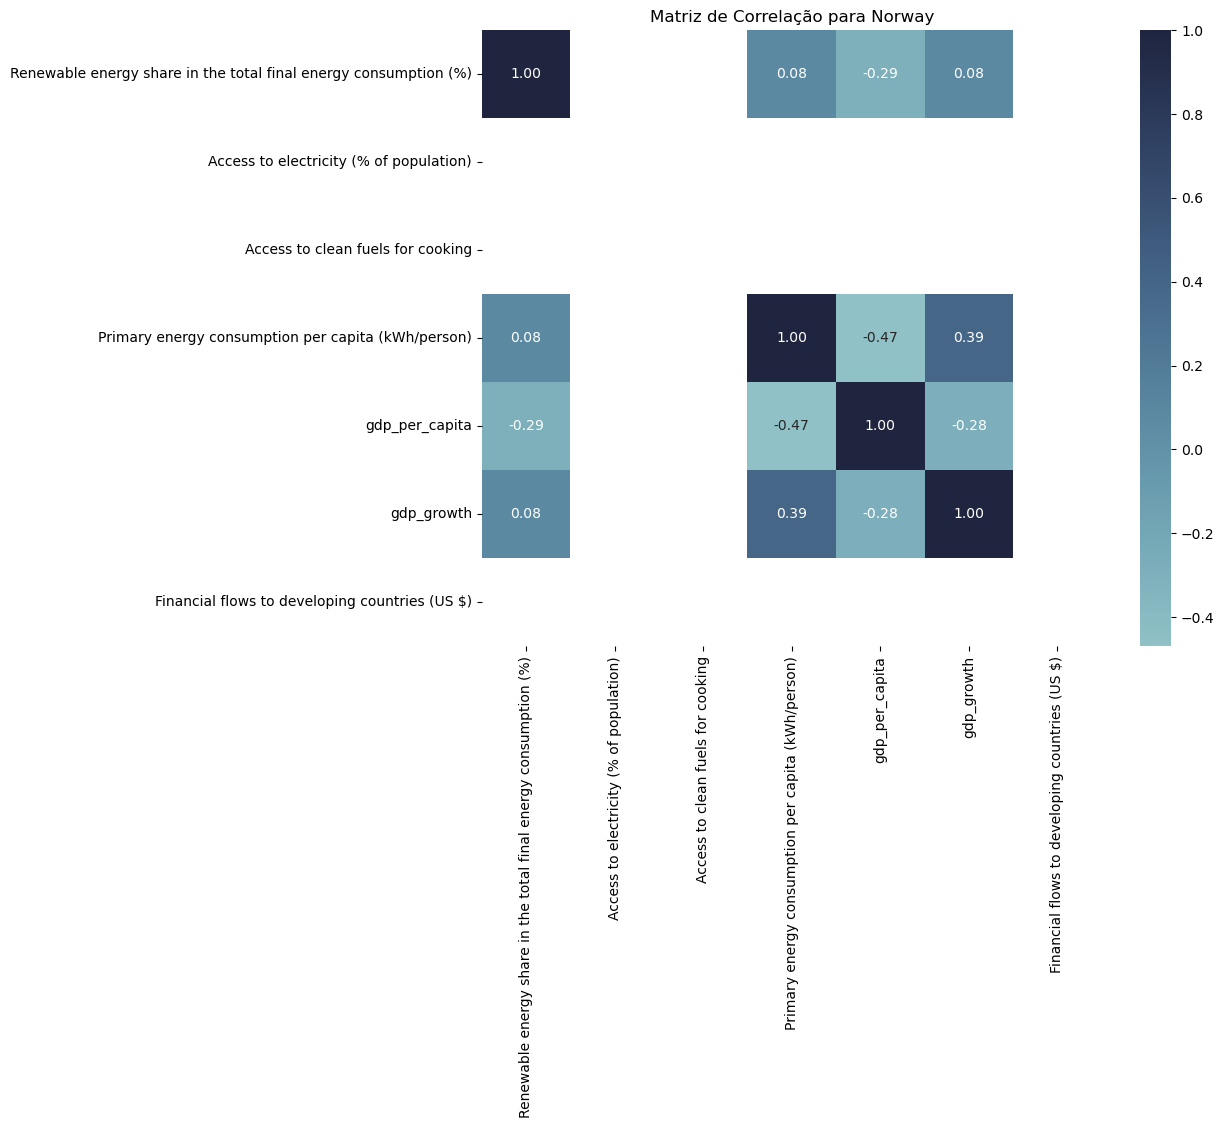

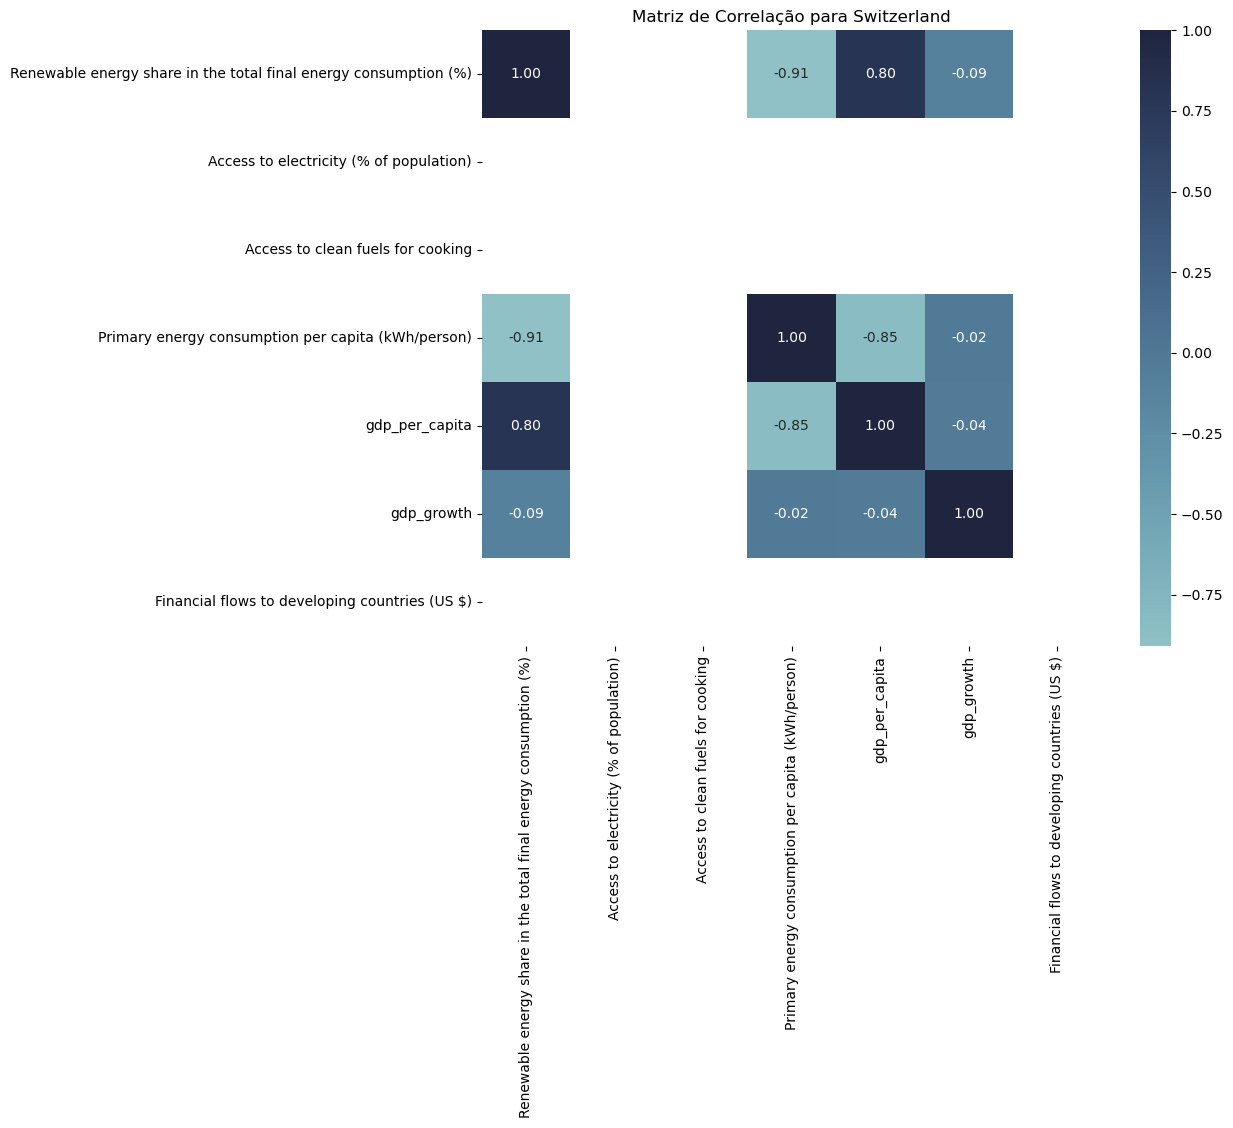

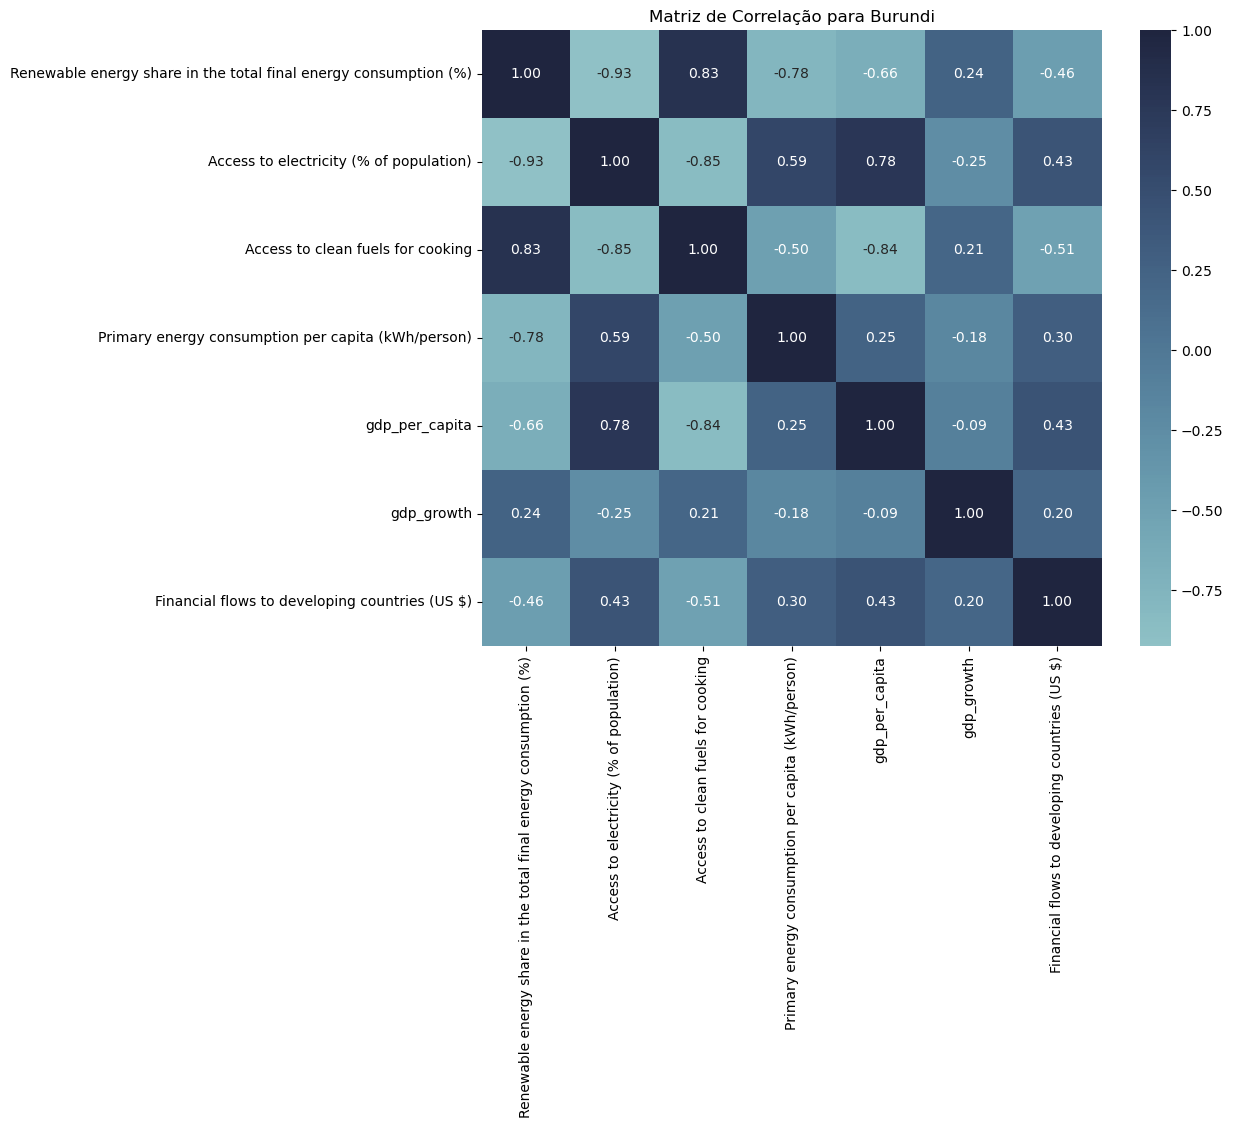

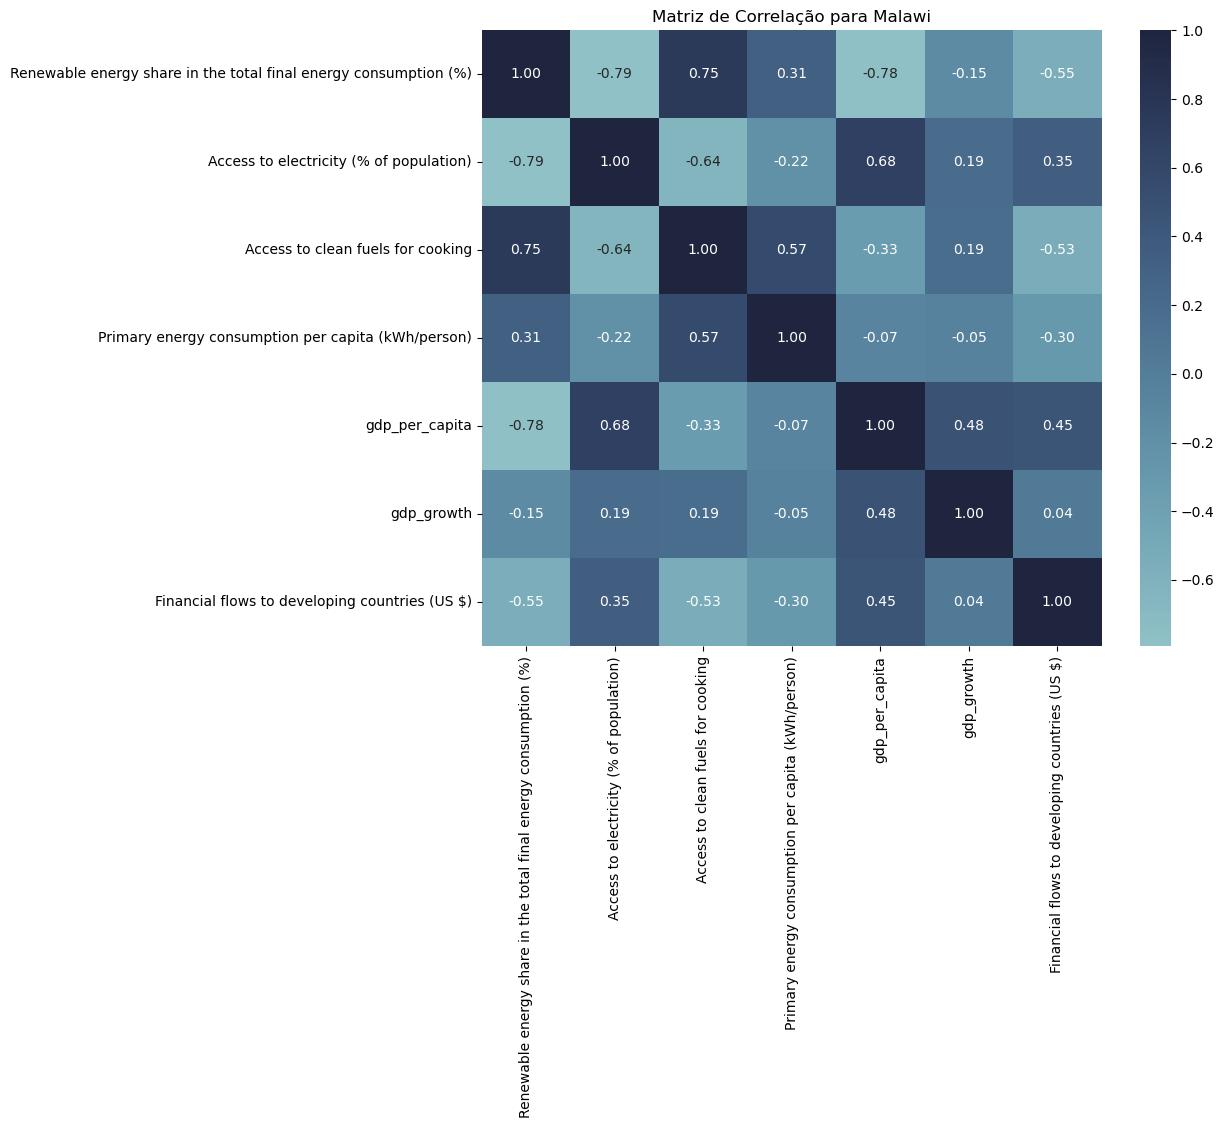

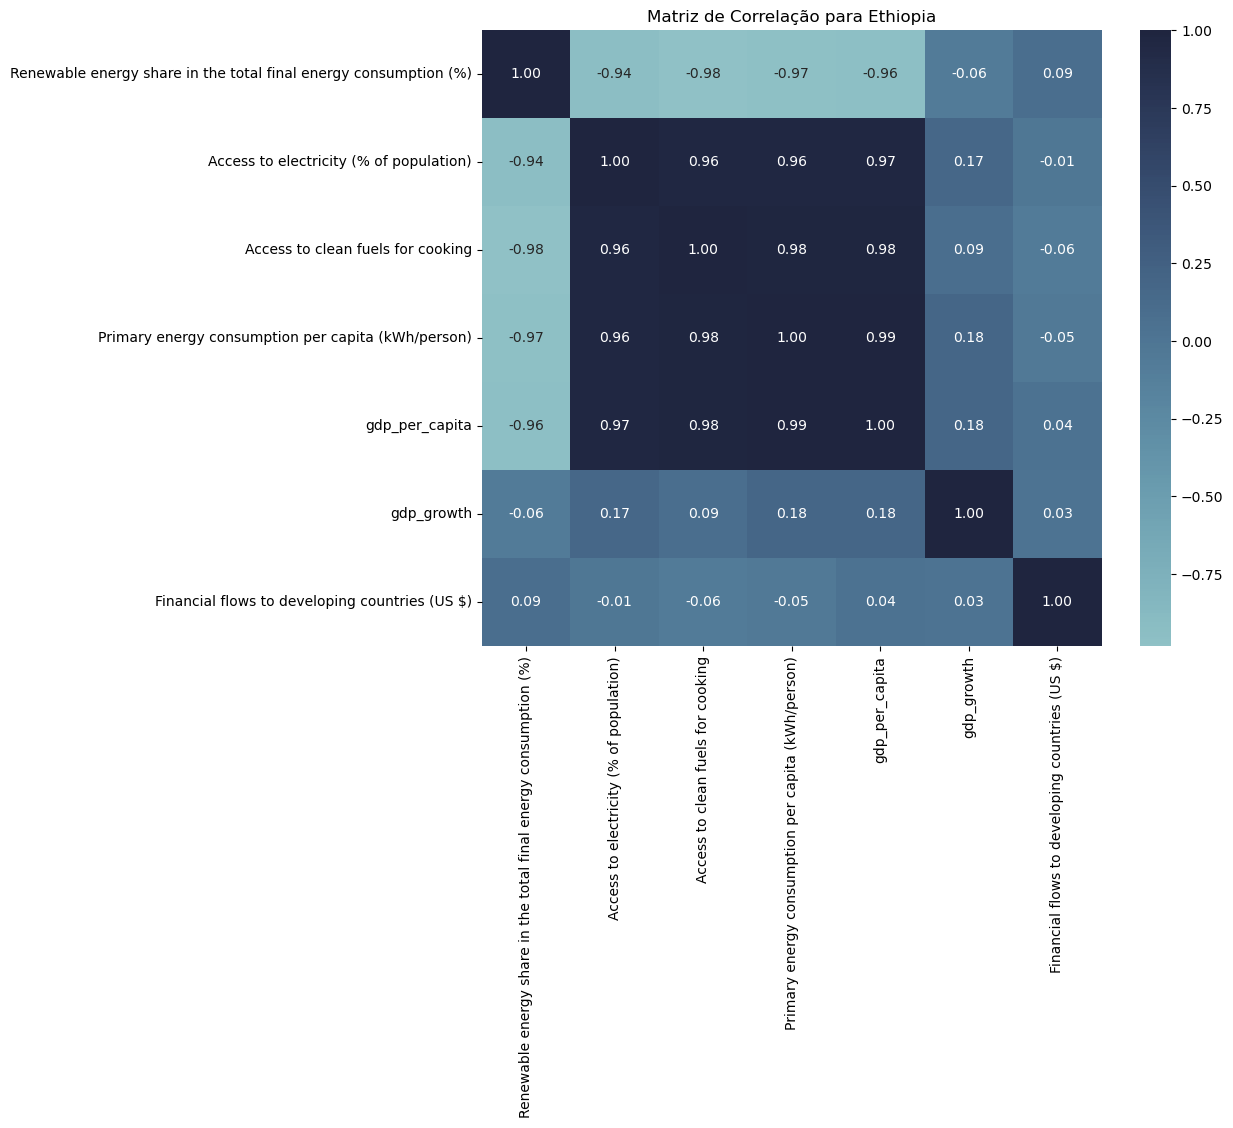

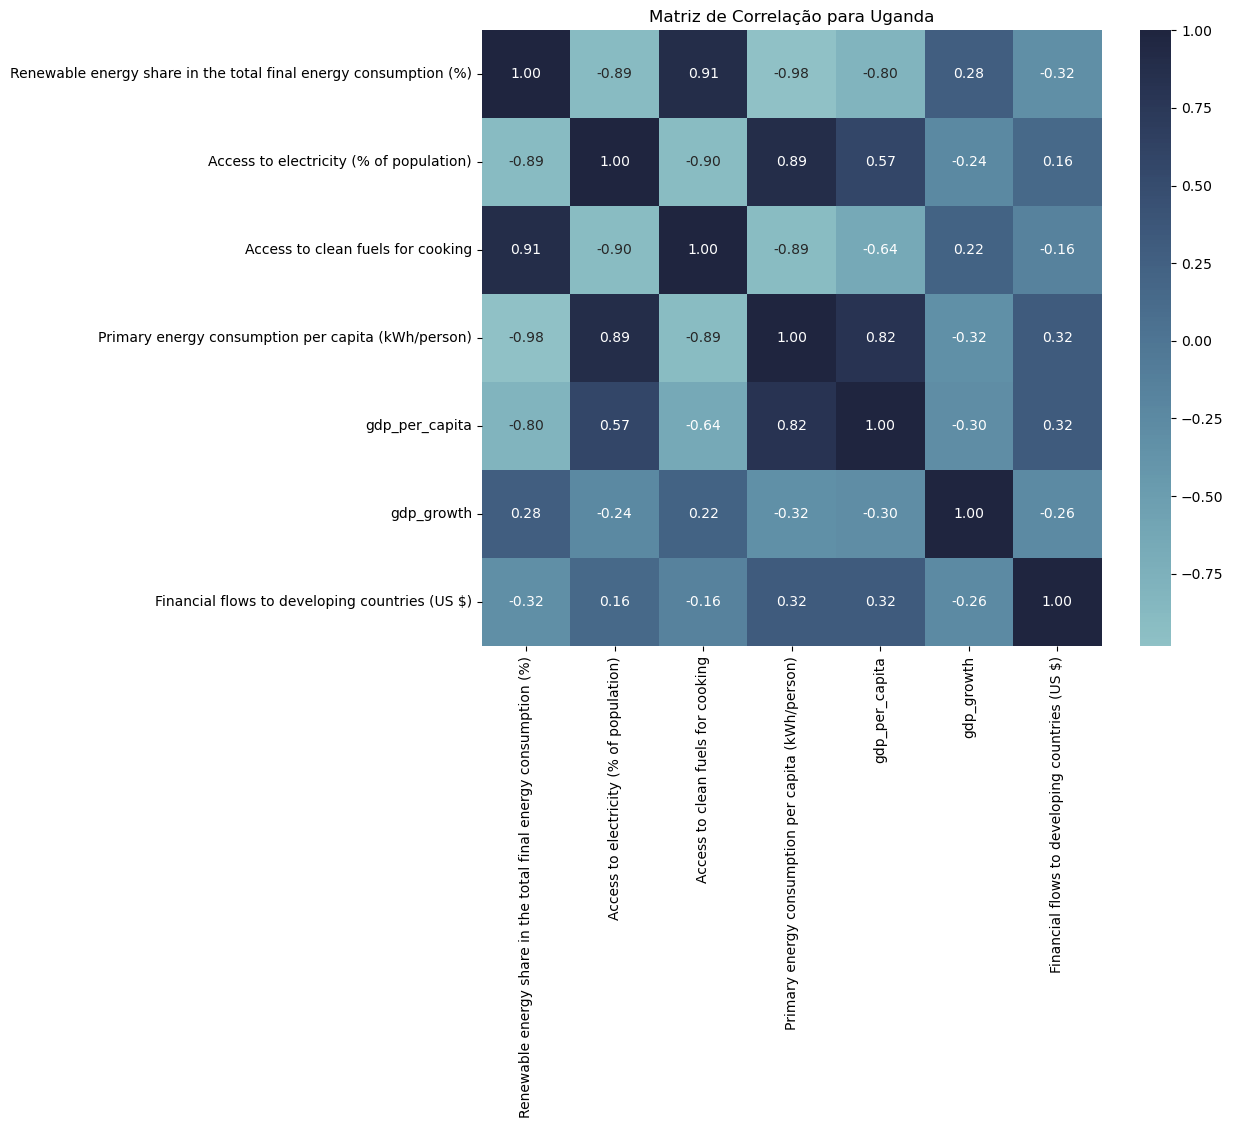

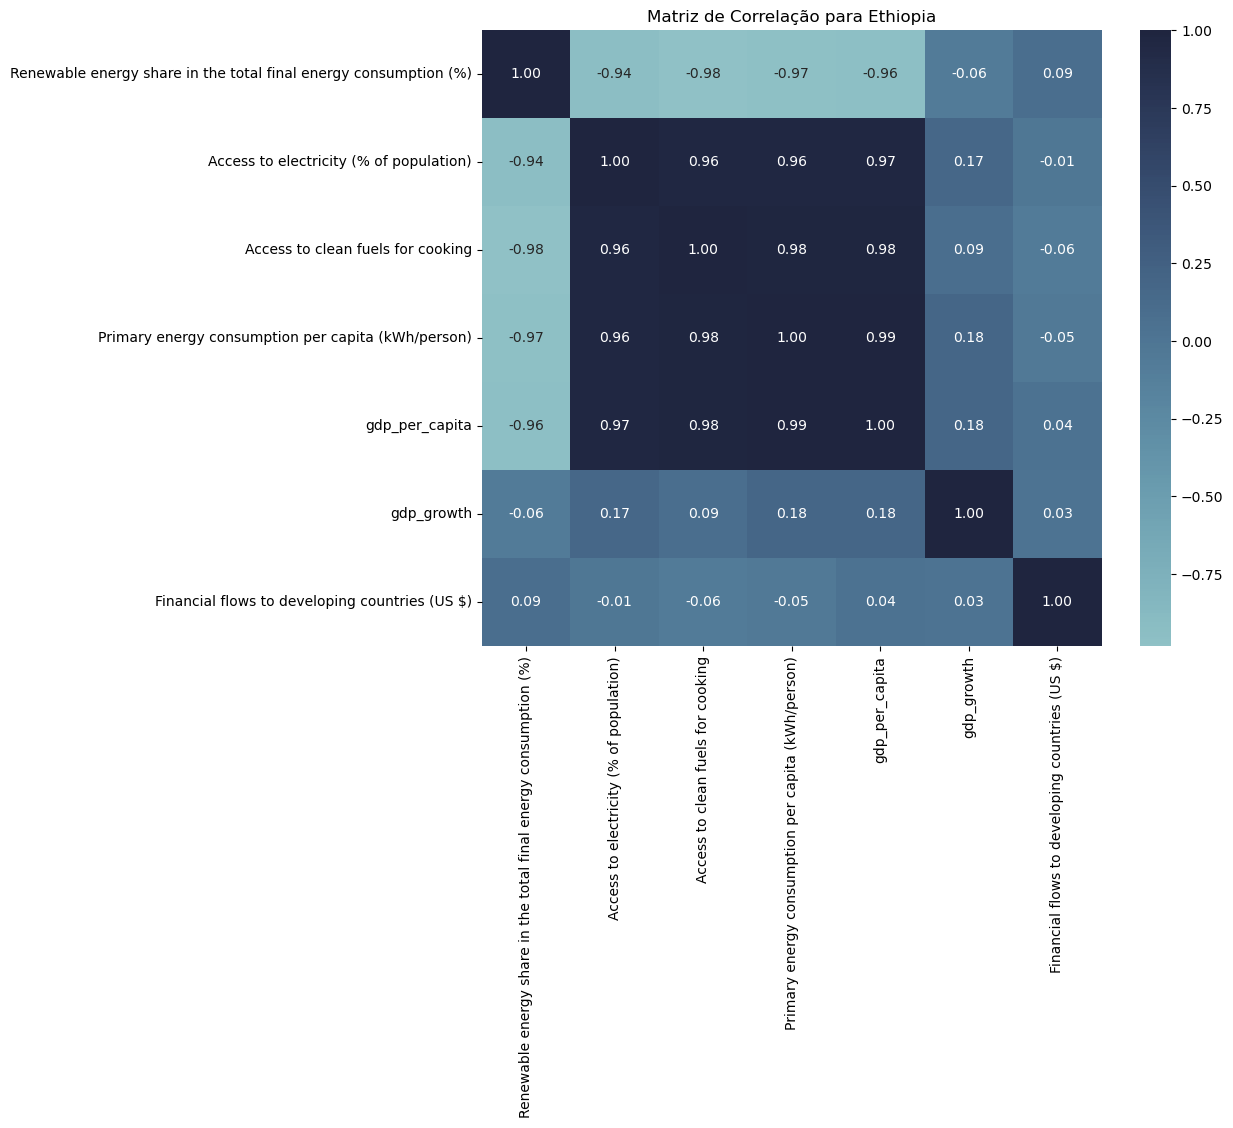

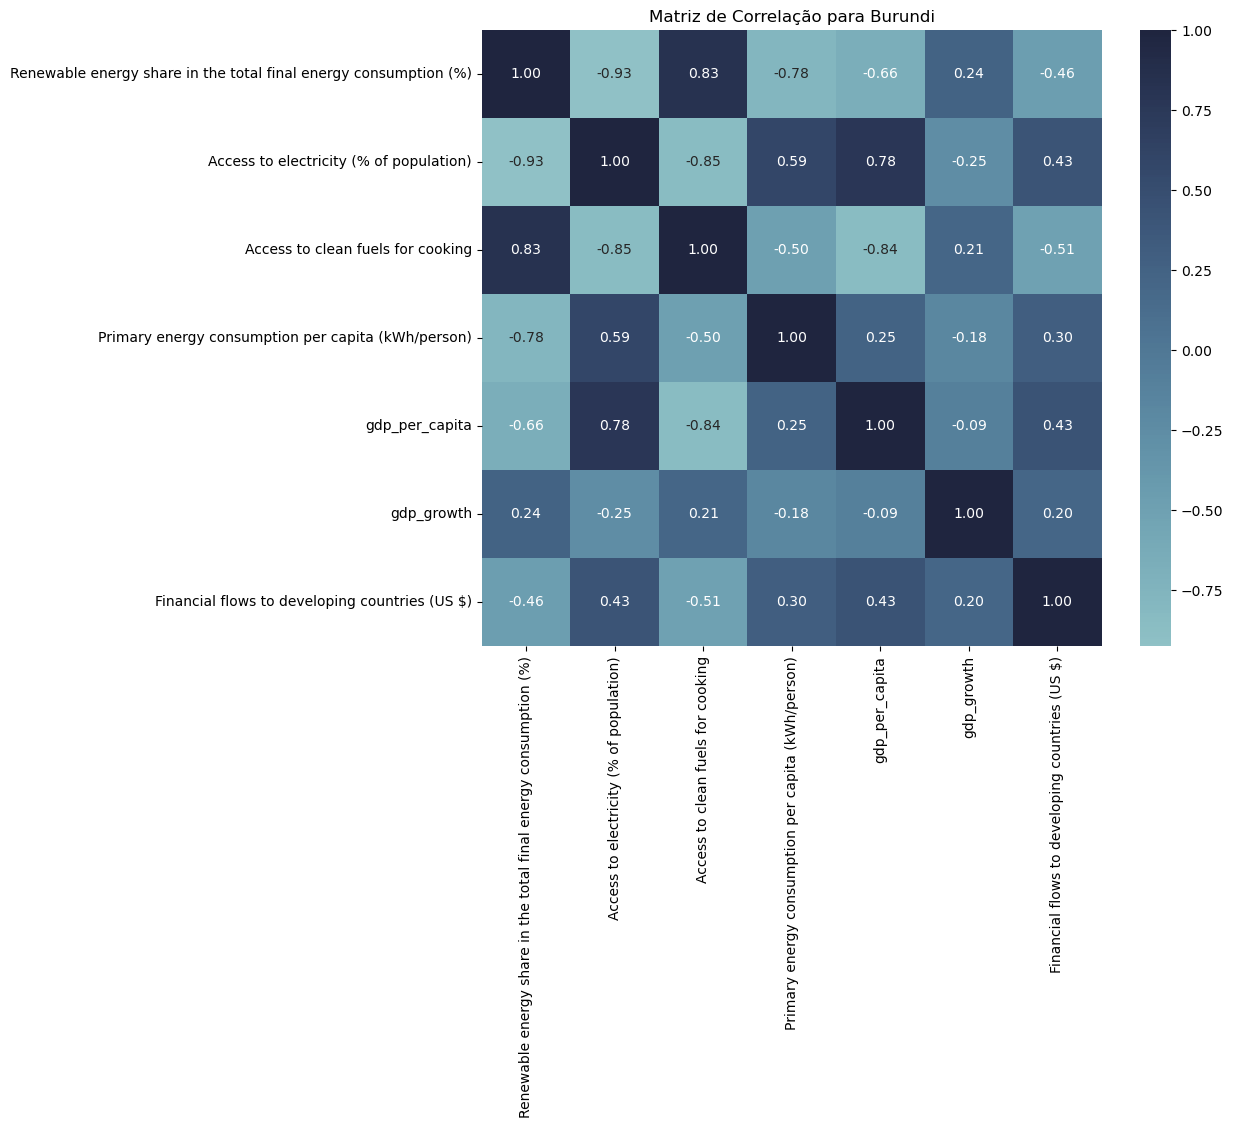

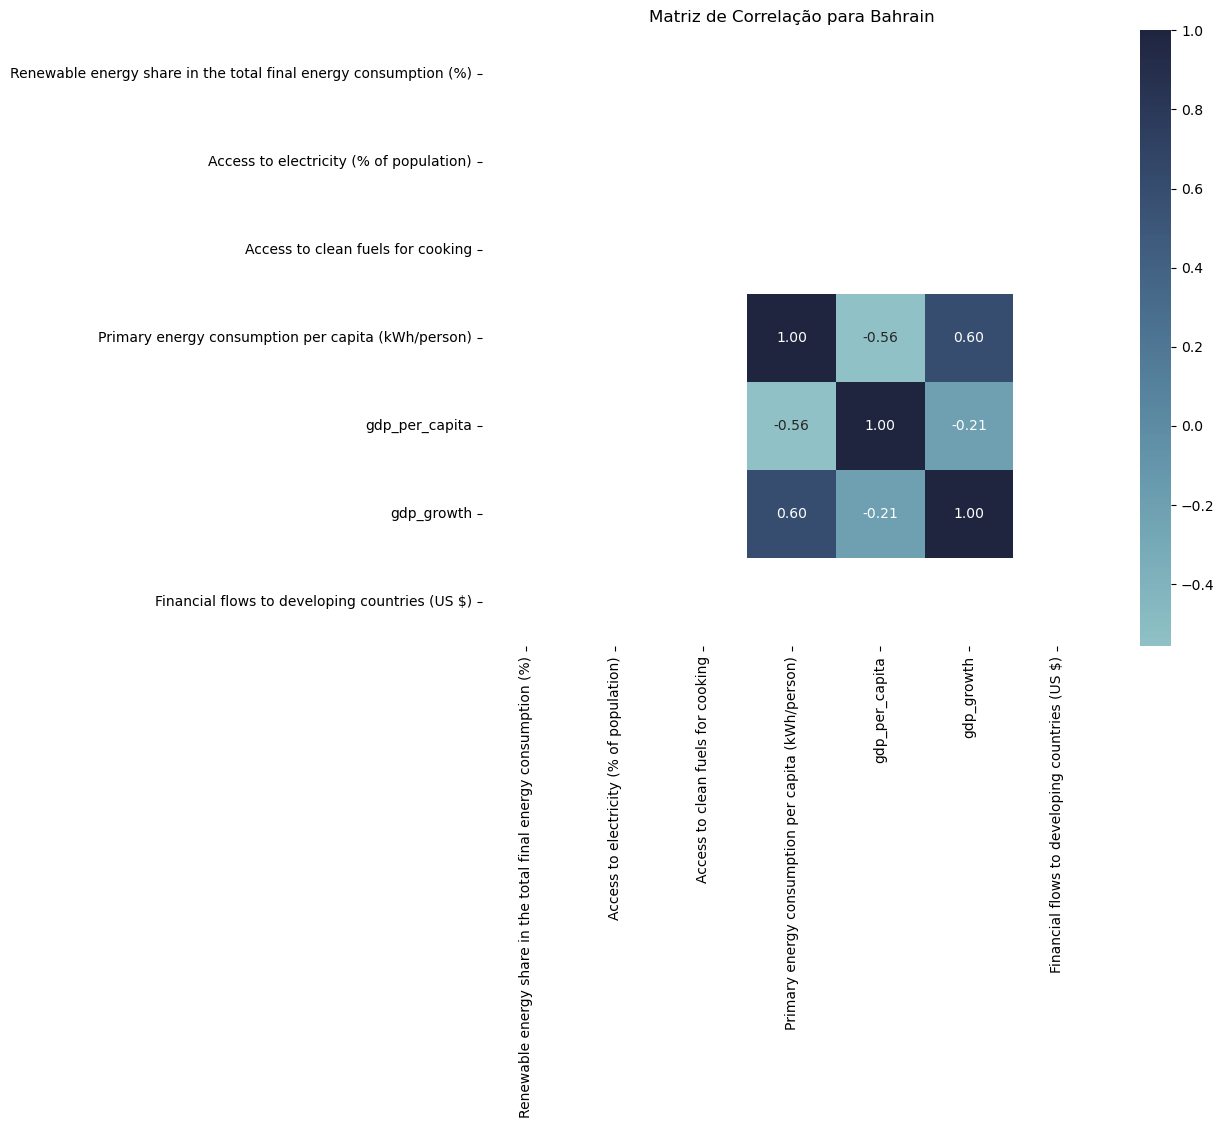

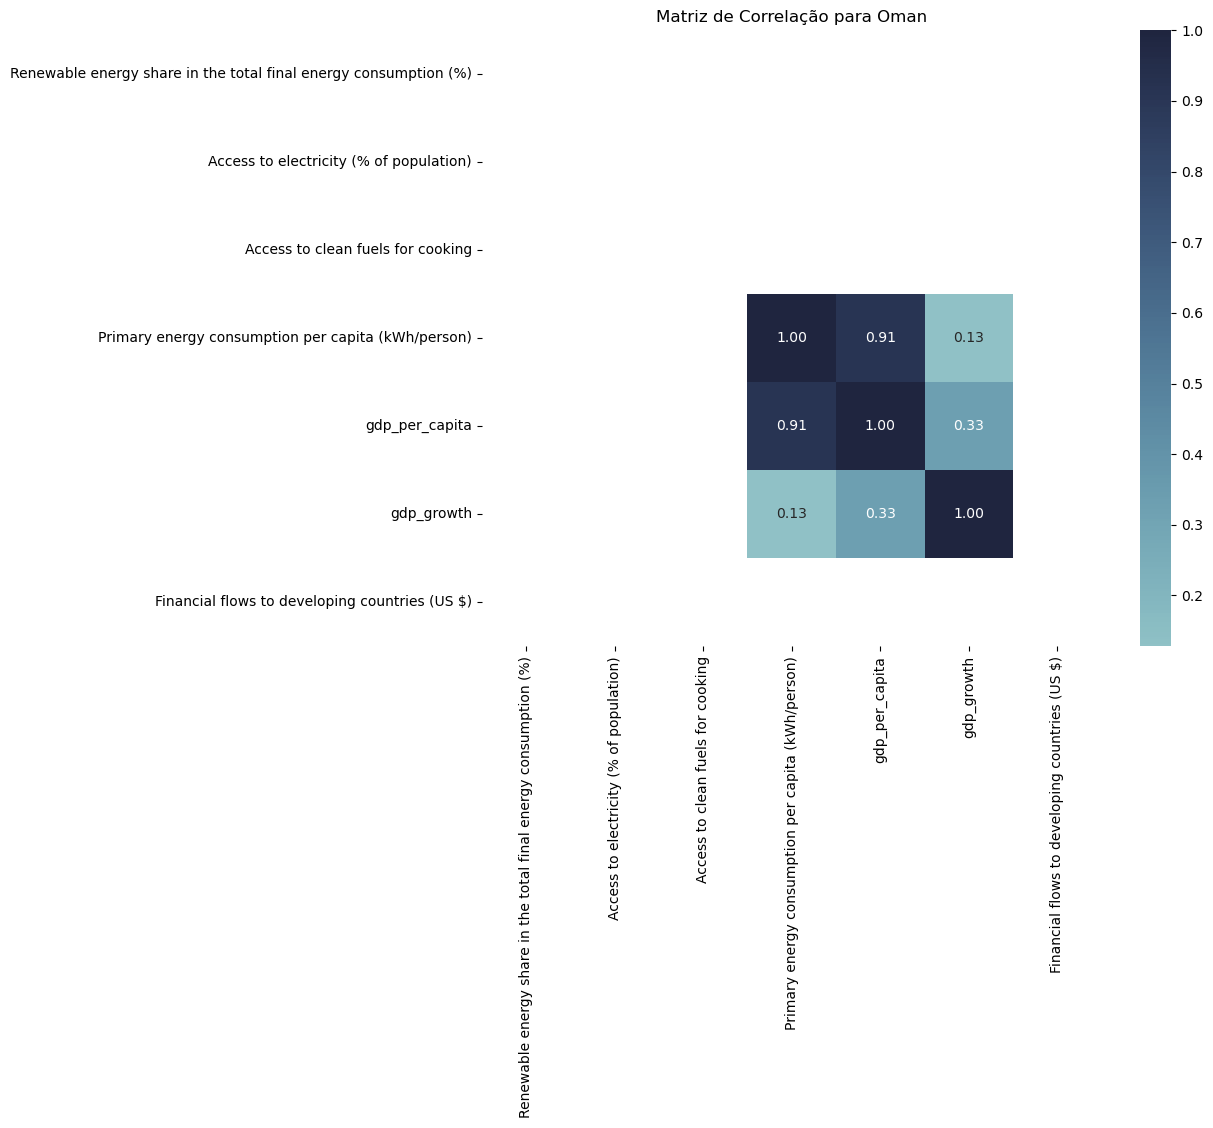

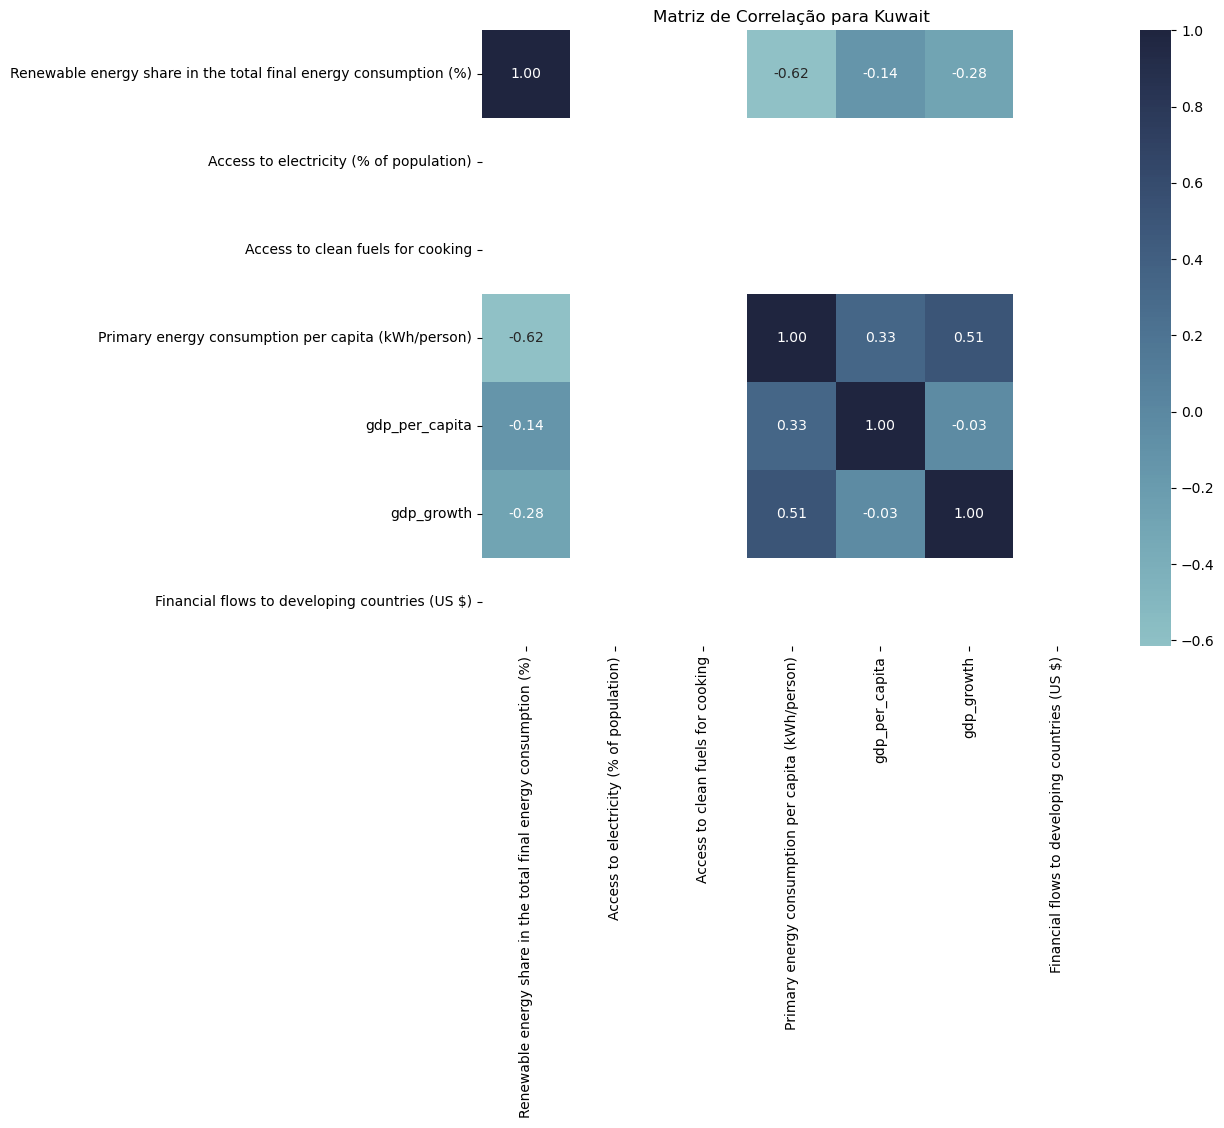

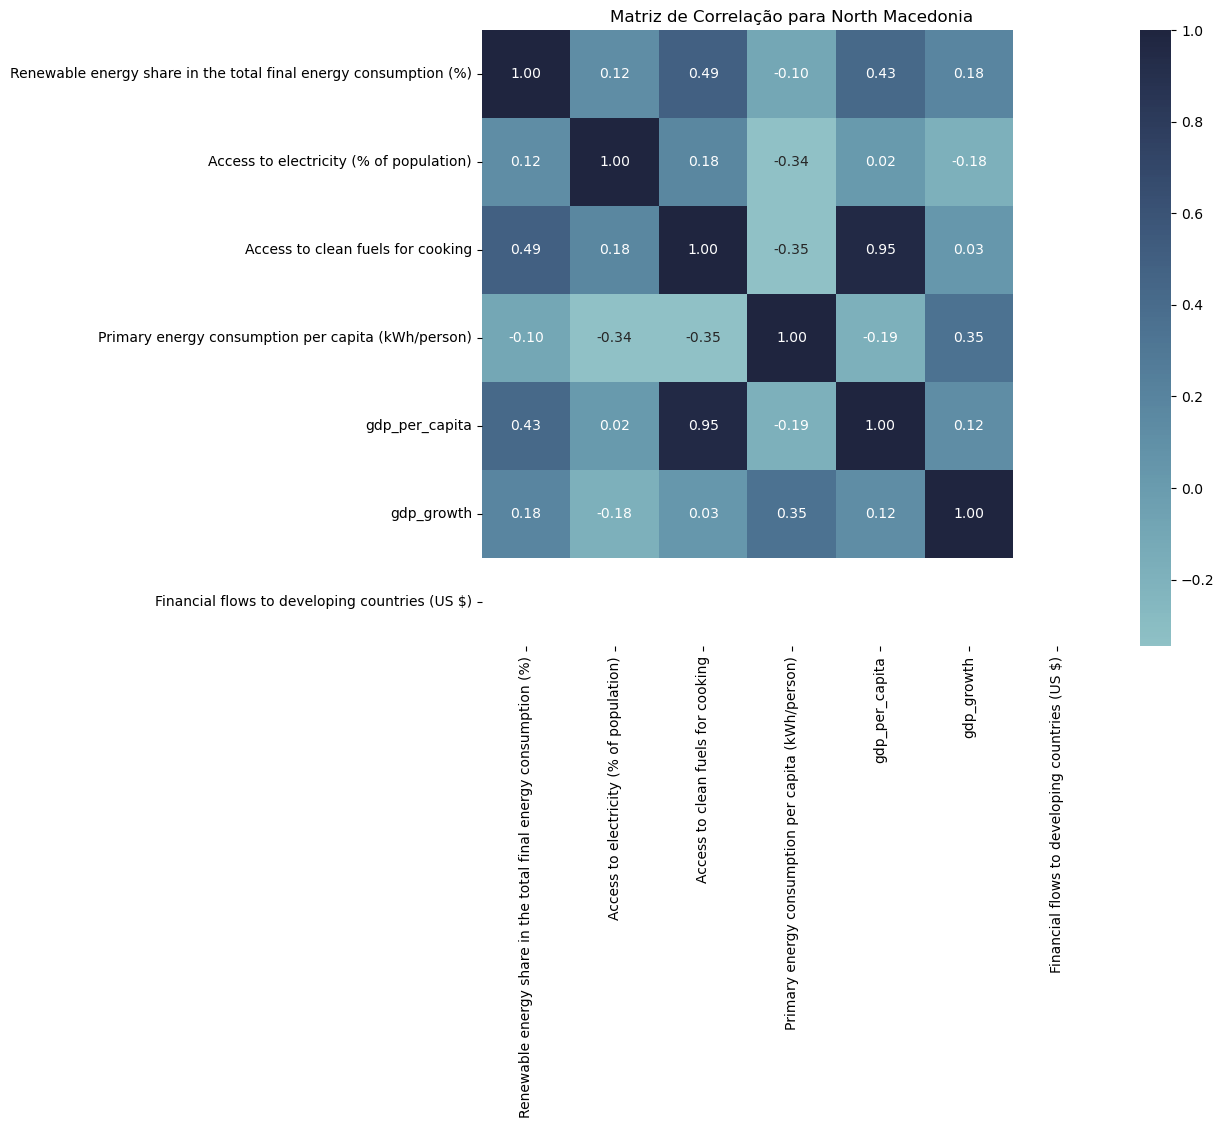

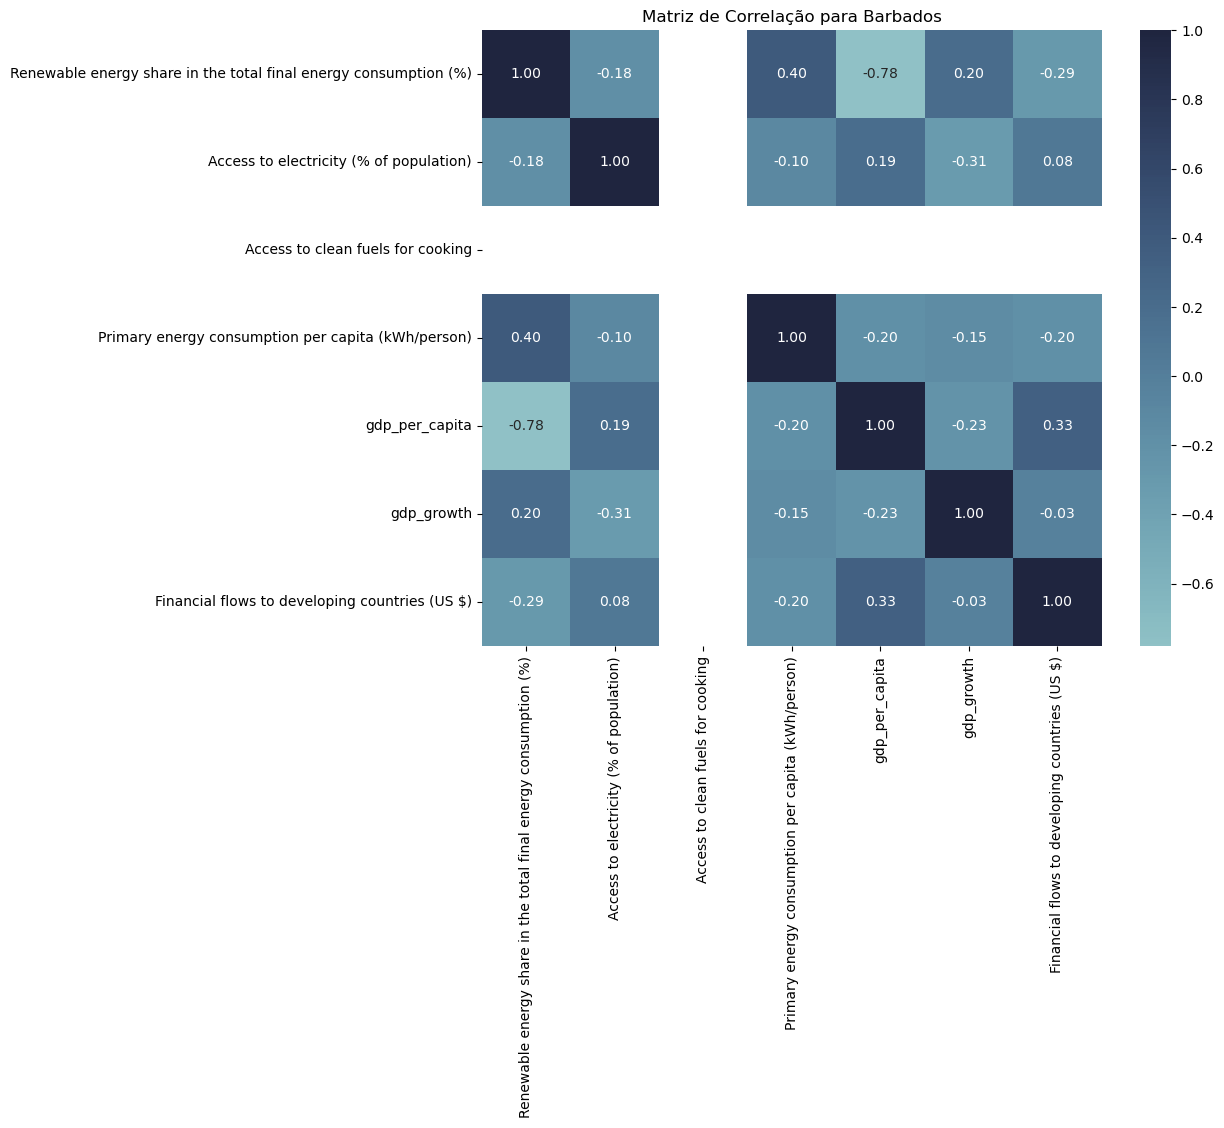

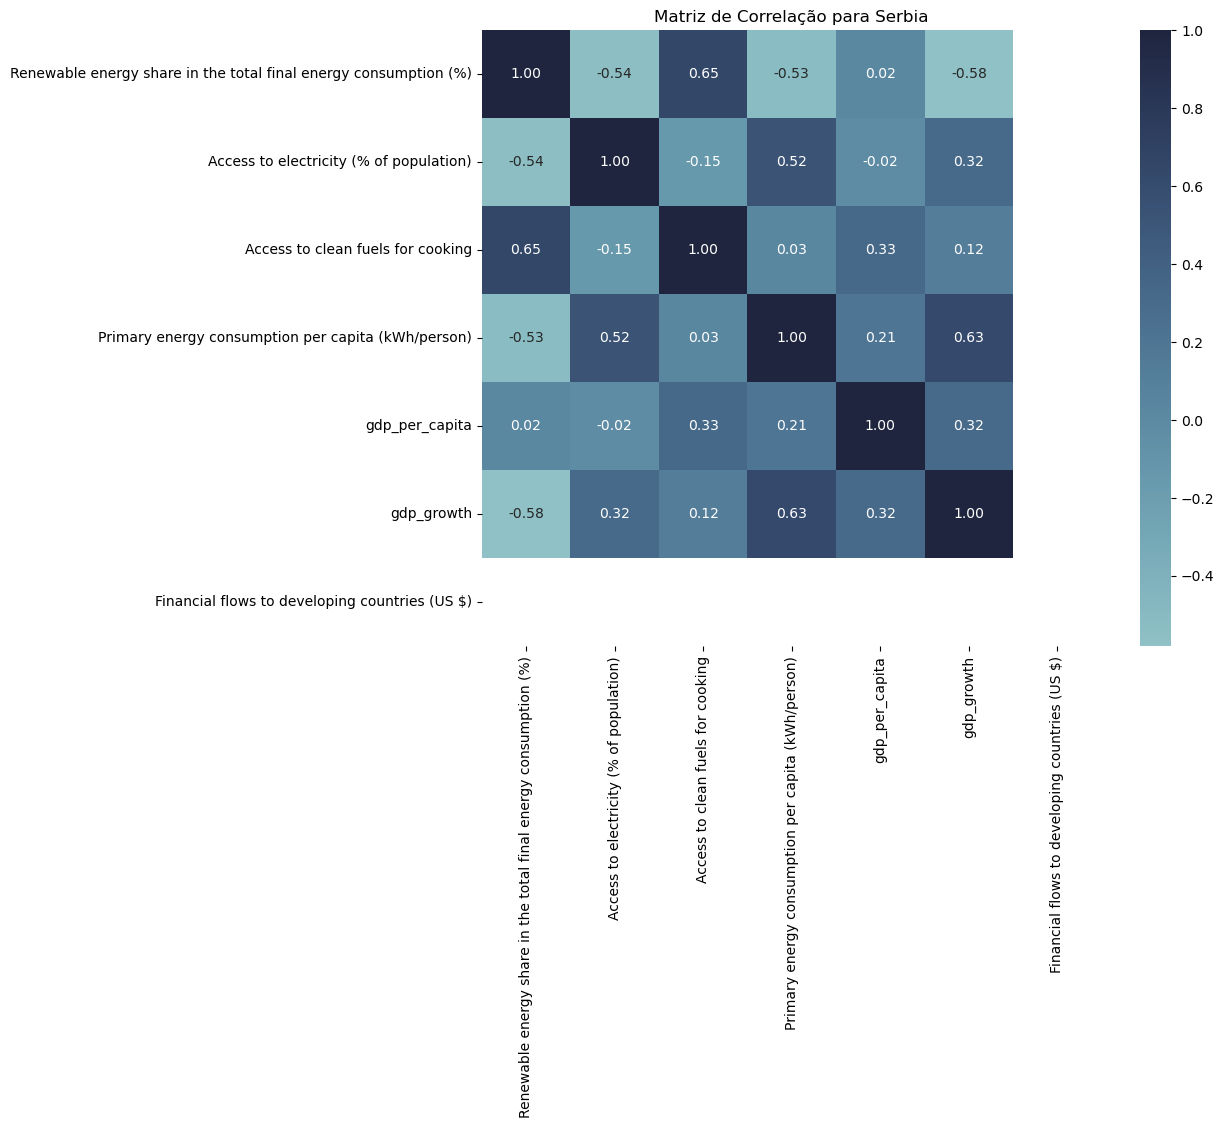

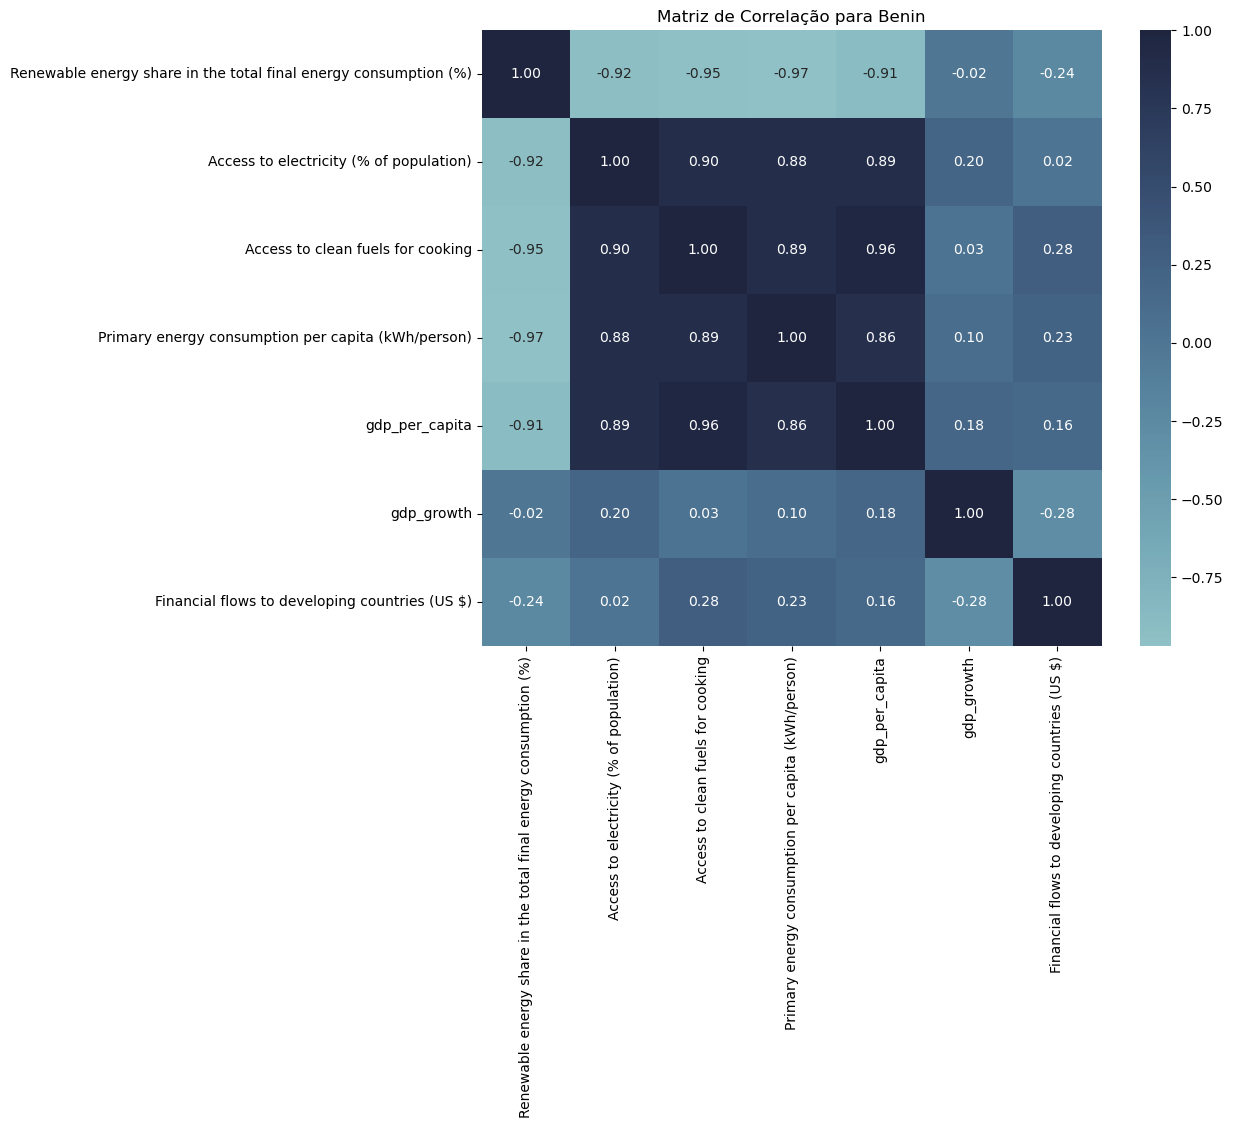

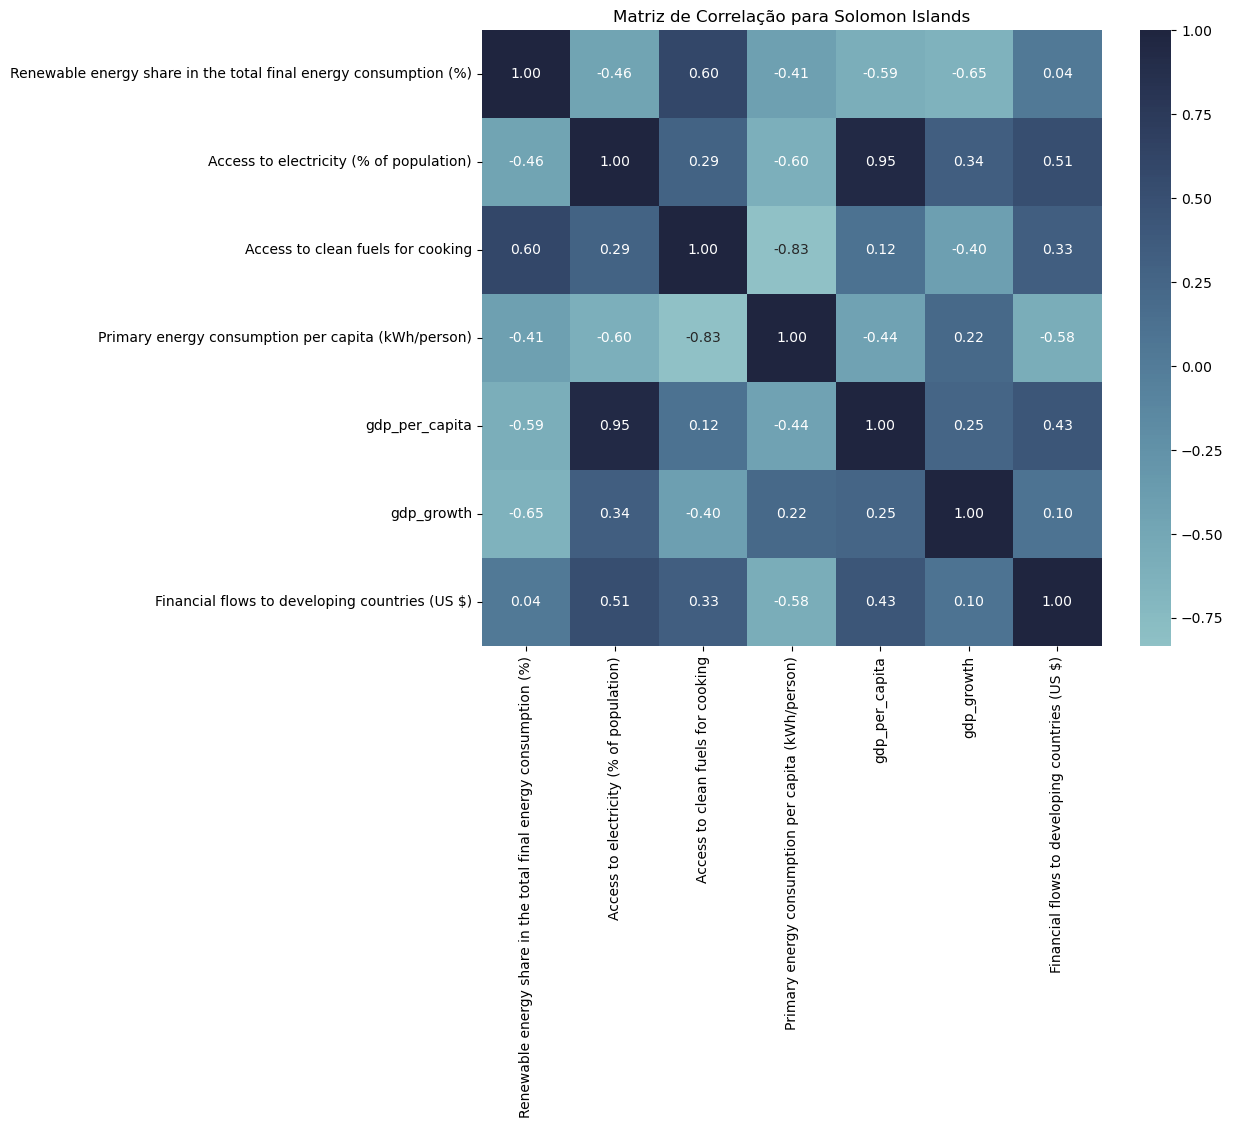

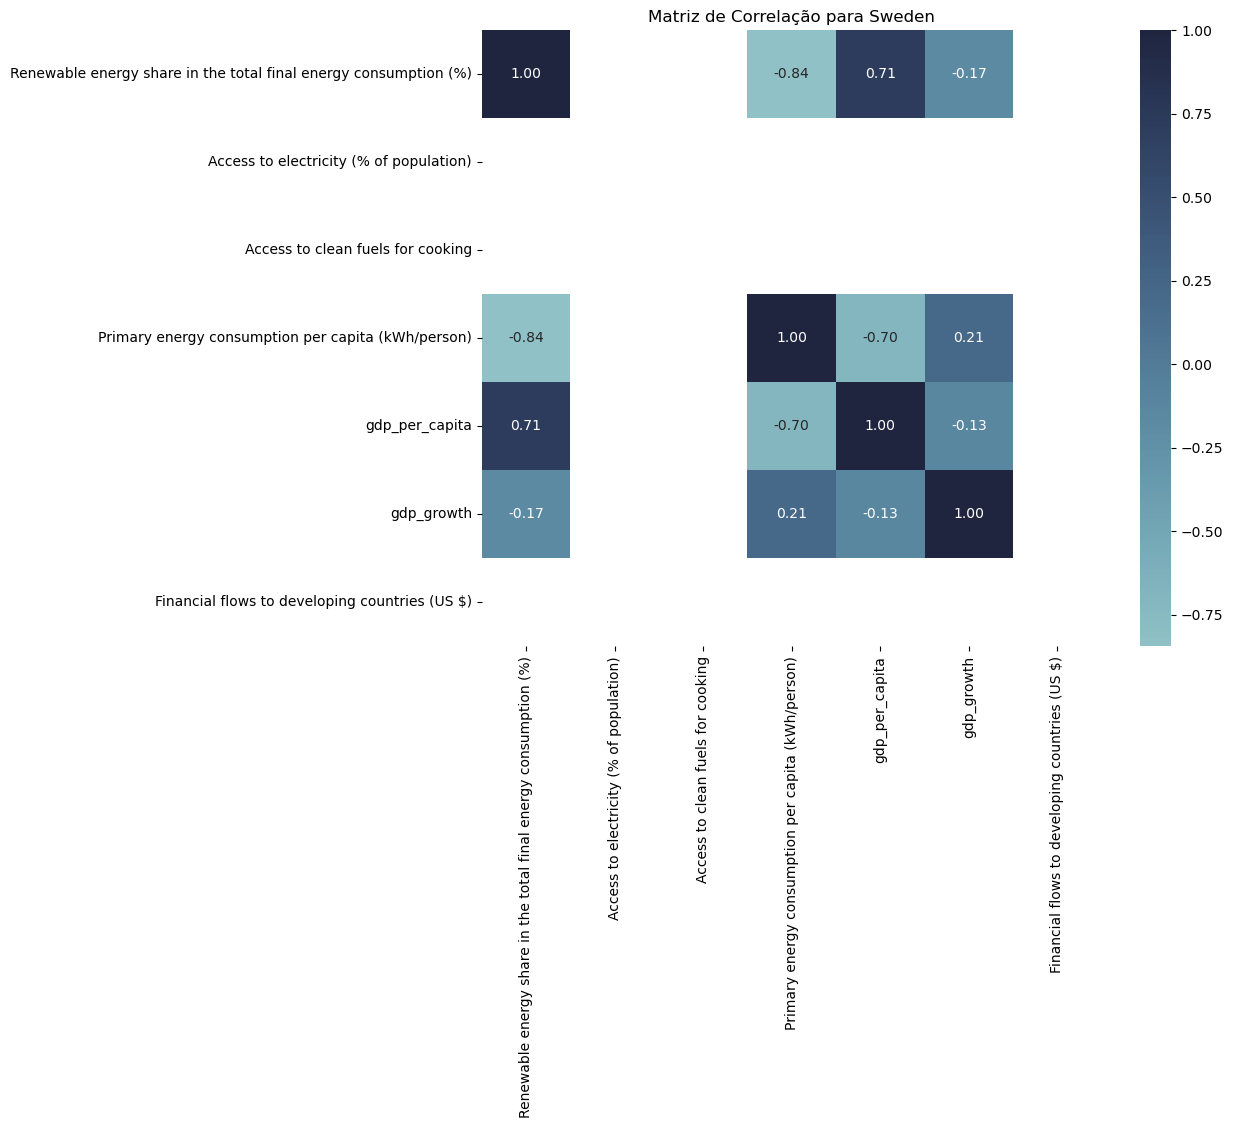

In [269]:
# Variáveis de interesse
variáveis_chave = [
    'Renewable energy share in the total final energy consumption (%)',
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Primary energy consumption per capita (kWh/person)',
    'gdp_per_capita',
    'gdp_growth',
    'Financial flows to developing countries (US $)'
]

# Criando matrizes de correlação para cada país de interesse
for pais in paises_interesse:
    data_pais = data[data['Entity'] == pais][variáveis_chave]
    
    # Calculando a matriz de correlação
    matriz_correlacao = data_pais.corr()

    # Plotando a matriz de correlação
    cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_correlacao, annot=True, cmap=cores_mapa, fmt=".2f")
    plt.title(f'Matriz de Correlação para {pais}')
    plt.show()

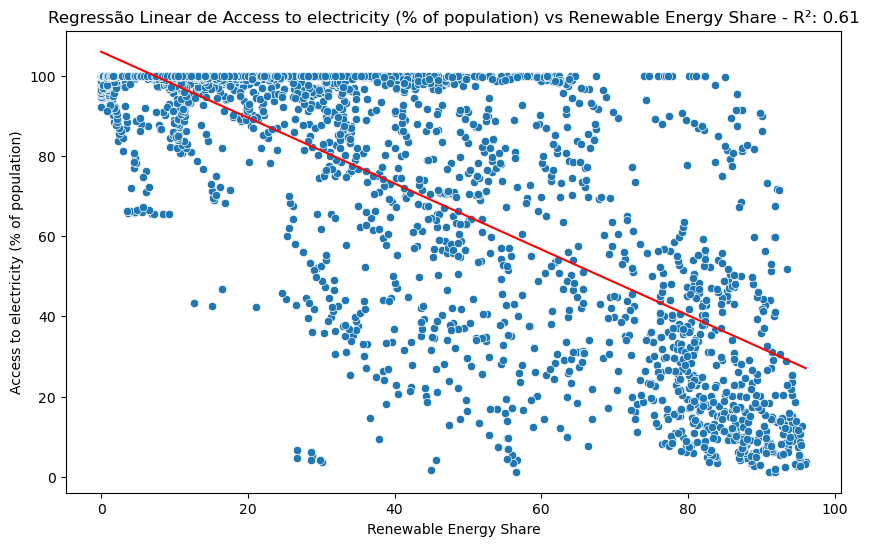

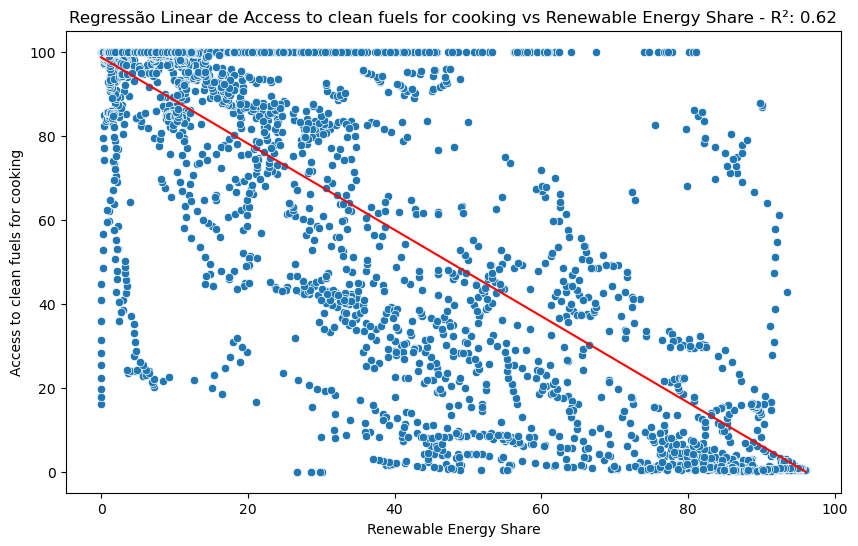

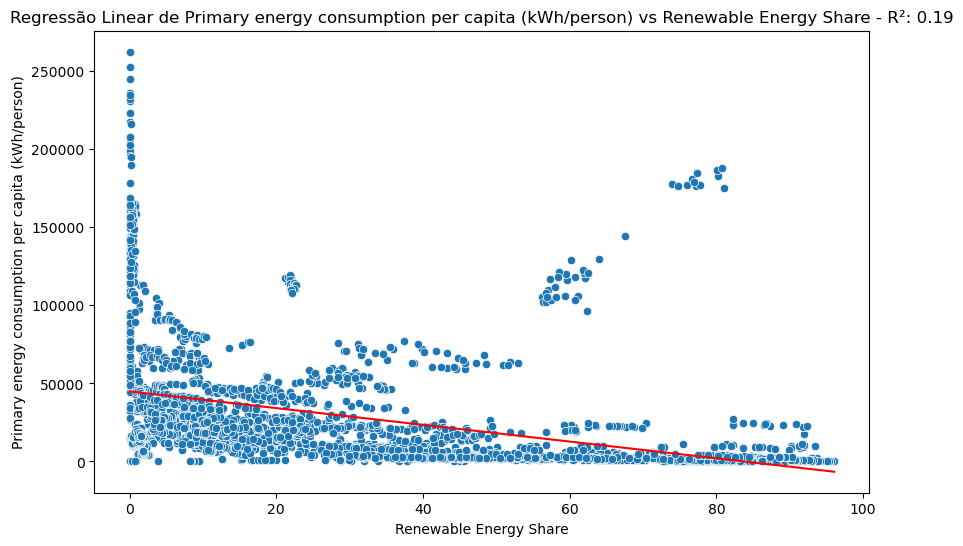

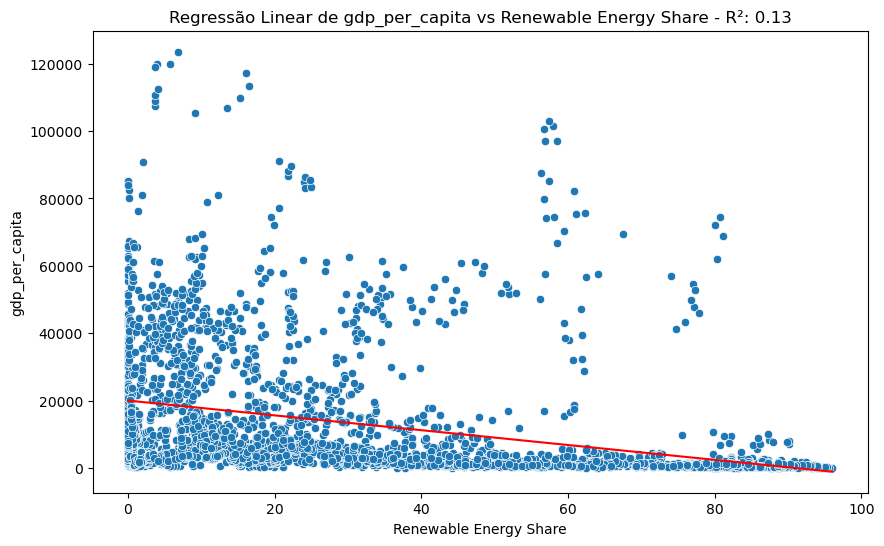

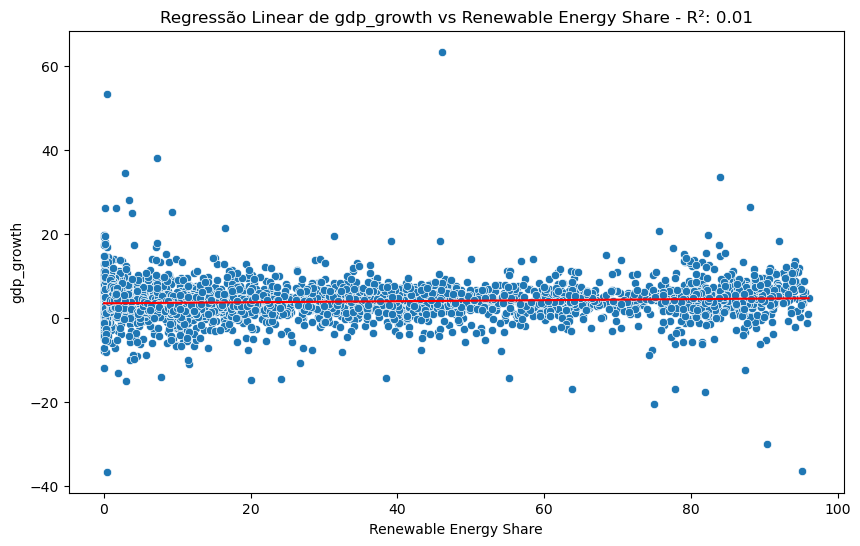

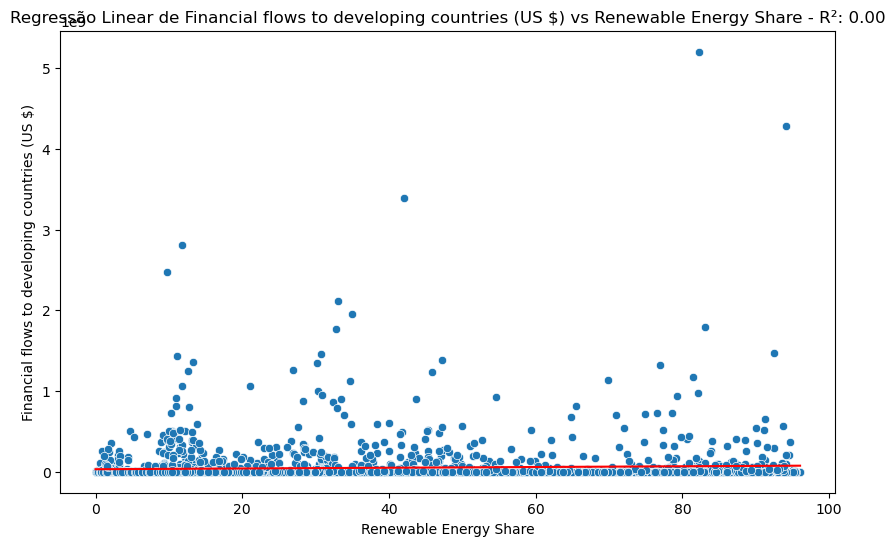

In [270]:
# Variável independente
x_var = 'Renewable energy share in the total final energy consumption (%)'

# Variável independente
x_var = 'Renewable energy share in the total final energy consumption (%)'

# Variáveis dependentes
y_vars = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Primary energy consumption per capita (kWh/person)',
    'gdp_per_capita',
    'gdp_growth',
    'Financial flows to developing countries (US $)'
]

# Regressão Linear Univarida para cada variável dependente
for y_var in y_vars:
    # Preparando os dados
    data_filtered = data[[x_var, y_var]].dropna()
    X = data_filtered[[x_var]]
    y = data_filtered[y_var]

    # Criando e ajustando o modelo
    model = LinearRegression()
    model.fit(X, y)

    # Fazendo previsões
    y_pred = model.predict(X)

    # Calculando R²
    r2 = r2_score(y, y_pred)

    # Plotando gráfico de dispersão com linha de regressão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[x_var], y=y)
    sns.lineplot(x=X[x_var], y=y_pred, color='red')
    plt.title(f'Regressão Linear de {y_var} vs Renewable Energy Share - R²: {r2:.2f}')
    plt.xlabel('Renewable Energy Share')
    plt.ylabel(y_var)
    plt.show()

In [274]:
data[data['Entity'] == 'Burundi'][variáveis_chave]

Renewable energy share in the total final energy consumption (%)  \
546                                              93.23                  
547                                              94.84                  
548                                              94.65                  
549                                              95.76                  
550                                              96.04                  
551                                              96.01                  
552                                              95.31                  
553                                              95.29                  
554                                              95.15                  
555                                              95.18                  
556                                              92.57                  
557                                              91.65                  
558                                              91.45                  
559                                              91.08                  
560                                              91.28                  
561                                              91.15                  
562                                              89.52                  
563                                              88.12                  
564                                              85.58                  
565                                              84.77                  

     Access to electricity (% of population)  \
546                                 2.463237   
547                                 2.797420   
548                                 3.124018   
549                                 3.445382   
550                                 3.763859   
551                                 3.207317   
552                                 2.660000   
553                                 4.725946   
554                                 4.800000   
555                                 5.399017   
556                                 5.300000   
557                                 6.122684   
558                                 6.500000   
559                                 6.900000   
560                                 7.000000   
561                                 8.427652   
562                                 9.348410   
563                                 9.300000   
564                                10.884909   
565                                11.356528   

     Access to clean fuels for cooking  \
546                                0.3   
547                                0.3   
548                                0.3   
549                                0.3   
550                                0.3   
551                                0.3   
552                                0.3   
553                                0.3   
554                                0.3   
555                                0.3   
556                                0.3   
557                                0.2   
558                                0.2   
559                                0.2   
560                                0.2   
561                                0.2   
562                                0.2   
563                                0.2   
564                                0.2   
565                                0.2   

     Primary energy consumption per capita (kWh/person)  gdp_per_capita  \
546                                          261.95847       136.463971   
547                                          217.60869       134.363427   
548                                          200.19261       123.117536   
549                                          157.22882       113.567251   
550                                          174.65433       128.336703   
551                                          145.98683       151.681566   
552                                          163.21136

In [271]:
data[data['Entity'] == 'Luxembourg'][variáveis_chave]

Renewable energy share in the total final energy consumption (%)  \
1954                                               6.81                  
1955                                               3.42                  
1956                                               1.32                  
1957                                               1.28                  
1958                                               1.35                  
1959                                               1.87                  
1960                                               2.08                  
1961                                               3.64                  
1962                                               3.96                  
1963                                               3.73                  
1964                                               3.68                  
1965                                               3.76                  
1966                                               4.15                  
1967                                               5.72                  
1968                                               6.85                  
1969                                               9.09                  
1970                                              13.50                  
1971                                              15.33                  
1972                                              16.09                  
1973                                              16.45                  

      Access to electricity (% of population)  \
1954                                    100.0   
1955                                    100.0   
1956                                    100.0   
1957                                    100.0   
1958                                    100.0   
1959                                    100.0   
1960                                    100.0   
1961                                    100.0   
1962                                    100.0   
1963                                    100.0   
1964                                    100.0   
1965                                    100.0   
1966                                    100.0   
1967                                    100.0   
1968                                    100.0   
1969                                    100.0   
1970                                    100.0   
1971                                    100.0   
1972                                    100.0   
1973                                    100.0   

      Access to clean fuels for cooking  \
1954                              100.0   
1955                              100.0   
1956                              100.0   
1957                              100.0   
1958                              100.0   
1959                              100.0   
1960                              100.0   
1961                              100.0   
1962                              100.0   
1963                              100.0   
1964                              100.0   
1965                              100.0   
1966                              100.0   
1967                              100.0   
1968                              100.0   
1969                              100.0   
1970                              100.0   
1971                              100.0   
1972                              100.0   
1973                              100.0   

      Primary energy consumption per capita (kWh/person)  gdp_per_capita  \
1954                                          85402.430      48538.78290   
1955                                          90348.625      48398.22929   
1956                                          97735.350      52754.27325   
1957                                         101260.220      65544.59195   
1958                                         113106.170      76404.41504   
1959                                         113049.230      

In [272]:
data[data['Entity'] == 'Luxembourg'][variáveis_chave].corr()

Renewable energy share in the total final energy consumption (%)  \
Renewable energy share in the total final energ...                                           1.000000                  
Access to electricity (% of population)                                                           NaN                  
Access to clean fuels for cooking                                                                 NaN                  
Primary energy consumption per capita (kWh/person)                                          -0.845616                  
gdp_per_capita                                                                               0.416204                  
gdp_growth                                                                                  -0.033613                  
Financial flows to developing countries (US $)                                                    NaN                  

                                                    Access to electricity (% of population)  \
Renewable energy share in the total final energ...                                      NaN   
Access to electricity (% of population)                                                 NaN   
Access to clean fuels for cooking                                                       NaN   
Primary energy consumption per capita (kWh/person)                                      NaN   
gdp_per_capita                                                                          NaN   
gdp_growth                                                                              NaN   
Financial flows to developing countries (US $)                                          NaN   

                                                    Access to clean fuels for cooking  \
Renewable energy share in the total final energ...                                NaN   
Access to electricity (% of population)                                           NaN   
Access to clean fuels for cooking                                                 NaN   
Primary energy consumption per capita (kWh/person)                                NaN   
gdp_per_capita                                                                    NaN   
gdp_growth                                                                        NaN   
Financial flows to developing countries (US $)                                    NaN   

                                                    Primary energy consumption per capita (kWh/person)  \
Renewable energy share in the total final energ...                                          -0.845616    
Access to electricity (% of population)                                                           NaN    
Access to clean fuels for cooking                                                                 NaN    
Primary energy consumption per capita (kWh/person)                                           1.000000    
gdp_per_capita                                                                              -0.335559    
gdp_growth                                                                                   0.109688    
Financial flows to developing countries (US $)                                                    NaN    

                                                    gdp_per_capita  \
Renewable energy share in the total final energ...        0.416204   
Access to electricity (% of population)                        NaN   
Access to clean fuels for cooking                              NaN   
Primary energy consumption per capita (kWh/person)       -0.335559   
gdp_per_capita                                            1.000000   
gdp_growth                                               -0.341301   
Financial flows to developing countries (US $)                 NaN   

                                                    gdp_growth  \
Renewable energy share in the total final energ...   -0.033613   
Access to electricity (% of population)                    NaN   
Access to